# Tema: Análisis de Mercado de Ropa de Tallas Extra. Parte 4

In [ ]:
from scipy import stats # scipy - scientific python, stats - estadística
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pylab import rcParams
from sklearn.model_selection import train_test_split
#import lightgbm as lgb
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from wordcloud import WordCloud

In [ ]:
nuevo_leon_poi = pd.read_csv('https://raw.githubusercontent.com/Axelflg/datasets/main/nuevo_leon_poi_cleanv1.0.csv')

In [ ]:
nuevo_leon_poi.head()

,Unnamed: 0,nombre_tienda,razon_social,sector_tienda,cantidad_personal,tipo_vialidad,calle,num_exterior,num_interior,colonia,codigo_postal,ubicacion,telefono,correo,pagina_web,longitud,latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,municipio,dimension_tienda,porcentaje_obesidad,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,place_id,categoria,popularidad_actual,horarios_populares,rating,rating_numero,horarios_populares_dias,tiempo_espera
0,0,"Monterrey, plaza cumbres",SERVICIOS SHASA S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",11 a 30 personas,AVENIDA,HACIENDA DE PEÑUELAS,6771,0,CUMBRES LAS PALMAS,64349,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,WWW.SHASA.COM,-100.397801,25.733109,CENTRO Y PLAZA COMERCIAL,PLAZA CUMBRES,1151 A 1157,Monterrey,Sin especificar,42.2707,6098.849922,1578,5,ChIJzdEedx2XYoYRunctbvVhb-I,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar
1,1,"Monterrey, gal.valle ote",SERVICIOS SHASA S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",6 a 10 personas,CALLE,PASEO NARANJO,1000,0,VALLE DEL MIRADOR,64750,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,WWW.SHASA.COM,-100.313720,25.638831,CENTRO Y PLAZA COMERCIAL,GALERIAS VALLE ORIENTE,1144 Y 1146,Monterrey,Sin especificar,42.2707,6098.849922,1578,12,Sin especificar,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar
2,2,"Monterrey, san agustin",SERVICIOS SHASA S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",11 a 30 personas,AVENIDA,Batallón San Patricio,1000,0,REAL DE SAN AGUSTIN,66260,"SAN PEDRO GARZA GARCÍA, San Pedro Garza García...",0.0,Sin especificar,WWW.SHASA.COM,-100.336835,25.648094,CENTRO Y PLAZA COMERCIAL,PLAZA FIESTA SAN AGUSTIN,SN,San Pedro Garza Garcia,A,35.1730,4634.679777,247,4,ChIJ8VltnG6-YoYRnDAJPlfzjRk,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar
3,3,Ropa dama y cosmeticos,10 ROPA DAMA Y COSMETICOS,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,CALLE,SERAFIN PEÑA,1010,10,MONTERREY CENTRO,64000,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,Sin especificar,-100.326419,25.667601,"TIANGUIS, BAZAR O PULGA",PULGA RIO MONTERREY,10,Monterrey,Sin especificar,42.2707,6098.849922,1578,282,ChIJRZ7FCCK-YoYRLz6AgoPG-Ws,"['Shopping mall', 'Down home cooking restauran...",12,"[[7, [[6, 0, '', '', '6 AM'], [7, 0, '', '', '...",4.1,5618.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...","[25, 25]"
4,4,Ropa dama,106 ROPA DAMA,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,CALLE,SERAFIN PEÑA,1010,0,MONTERREY CENTRO,64000,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,Sin especificar,-100.326419,25.667601,"TIANGUIS, BAZAR O PULGA",PULGA RIO MONTERREY,106,Monterrey,Sin especificar,42.2707,6098.849922,1578,282,Sin especificar,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar


## Porcentaje de obesidad por Municipio

**BOXPLOT**

Visualizamos nuestros datos a través de un BOXPLOT (también llamado gráfico de caja y bigotes) que son una manera de visualizar la distribución de nuestros datos usando percentiles. 

*   Ahora sabemos que la mayoría de nuestros datos están concentrados en valores entre 41 y 47 y que los valores muy altos o bajos son valores atípicos de nuestro conjunto de datos.
*   Podemos observar que dentro del rango total de datos, tenemos una distribución que tiende de los valores de la media (línea amarilla) a los más grandes.
*   Podemos visualizar que nuestros datos en general están poco dispersos, pero sí hay valores que se extienden a los lado, sobre todo a la izquierda ya que hay algunos valores que se extienden bastante lejos.

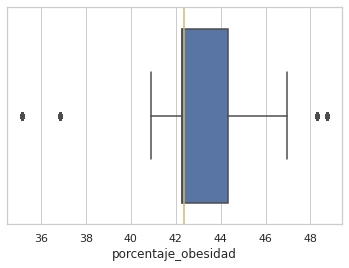

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=nuevo_leon_poi['porcentaje_obesidad'])
plt.axvline(nuevo_leon_poi['porcentaje_obesidad'].mean(), c='y')

**SCORE DE RANGO INTERCUARTÍLICO**

VALORES ATÍPICOS: Podemos observar que a pesar de tener alguno valores atípicos tan extremos, tenemos bastante valores concentrados que hacen que el promedio sea cercano a la mediana.

Vamos a eliminar estos valores atípicos utilizando el SCORE de Rango Intercuartílico (IQR-Score) para verificar si mejora nuestra distribución, pero solo los valores menores al "Percentil 25 - 1.5* IQR" ya que nos interesa conservar aquellas locaciones de tiendas en donde el porcentaje de obesidad es alto a pesar de ser atípico.

In [ ]:
iqr = nuevo_leon_poi['porcentaje_obesidad'].quantile(0.75) - nuevo_leon_poi['porcentaje_obesidad'].quantile(0.25)
filtro_inferior = nuevo_leon_poi['porcentaje_obesidad'] > nuevo_leon_poi['porcentaje_obesidad'].quantile(0.25) - (iqr * 1.5)

df_filtrado_po = nuevo_leon_poi[filtro_inferior]

Eliminando los valores atípicos por la izquierda podemos visualizar mejor nuestro boxplot.
El valor de la mediana se conservó igual, lo cual es un indicador que en el centro de nuestros datos ordenados acendentemente se tiene más de un registro con el mismo valor
Los valores de media y desviación estándar cambiaron:
*   La media se incrementó el valor de 42.38 a 43.06 porque se eliminaron los valores atípicos inferiores
*   La desviación estándar disminuyó de 2.72 a 1.75 ya que al eliminar los valores atípicos, el datos se encuentran más cercanos a la media.




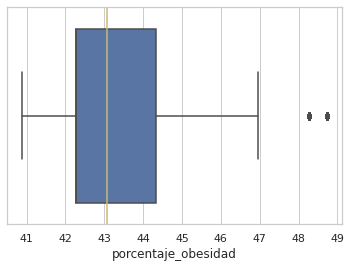

In [ ]:
sns.boxplot(x=df_filtrado_po['porcentaje_obesidad'])
plt.axvline(df_filtrado_po['porcentaje_obesidad'].mean(), c='y')

In [ ]:
nuevo_leon_poi['porcentaje_obesidad'].agg(['mean', 'median', 'std']) # Datos originales

mean      42.388281
median    42.270700
std        2.720806
Name: porcentaje_obesidad, dtype: float64

In [ ]:
df_filtrado_po['porcentaje_obesidad'].agg(['mean', 'median', 'std']) # Quitando los valores atípicos

mean      43.061508
median    42.270700
std        1.751650
Name: porcentaje_obesidad, dtype: float64

**TABLAS DE FRECUENCIA**

In [ ]:
porcentaje_obesidad = nuevo_leon_poi['porcentaje_obesidad']
porcentaje_obesidad.max() - porcentaje_obesidad.min()

13.554299999999998

In [ ]:
segmentos = pd.cut(porcentaje_obesidad, 14)

Tenemos una tabla donde los índices son los 14 rangos en los que se dividió nuestro dataset y los valores de la tabla son los conteos de cada agrupación. De esta manera quedan aún en más evidencia los valores atípicos, ya que podemos ver varios segmentos donde la cantidad de muestras es muy baja. En el caso de los valores atípicos inferiores tenemos un conteo alto, pero debido a que nos estamos enfocando en las localidades con mayor número de obesidad, los podemos eliminar.

In [ ]:
nuevo_leon_poi['porcentaje_obesidad'].groupby(segmentos).count()

porcentaje_obesidad
(35.159, 36.141]     247
(36.141, 37.109]      87
(37.109, 38.077]       0
(38.077, 39.046]       0
(39.046, 40.014]       0
(40.014, 40.982]     113
(40.982, 41.95]      441
(41.95, 42.918]     1786
(42.918, 43.886]       6
(43.886, 44.855]     521
(44.855, 45.823]     251
(45.823, 46.791]      33
(46.791, 47.759]      95
(47.759, 48.727]     115
Name: porcentaje_obesidad, dtype: int64

In [ ]:
porcentaje_obesidad_filtrado = df_filtrado_po['porcentaje_obesidad']
segmentos_filtrado = pd.cut(porcentaje_obesidad_filtrado, 14)

Una vez que eliminamos los valores atípicos inferiores podemos ver mejor distribuídos nuestros datos. Además, con esta tabla de frecuencias es evidente que los datos se conglomeran hacia la izquierda, pero lo comprobaremos con los histogramas.

In [ ]:
df_filtrado_po['porcentaje_obesidad'].groupby(segmentos_filtrado).count()

porcentaje_obesidad
(40.883, 41.451]     504
(41.451, 42.011]      50
(42.011, 42.57]     1578
(42.57, 43.13]       208
(43.13, 43.69]         6
(43.69, 44.249]        0
(44.249, 44.809]     521
(44.809, 45.369]       0
(45.369, 45.929]     251
(45.929, 46.488]      33
(46.488, 47.048]      95
(47.048, 47.608]       0
(47.608, 48.168]       0
(48.168, 48.727]     115
Name: porcentaje_obesidad, dtype: int64

**HISTOGRAMA**

En el histograma podemos ver a simple vista que tenemos una distribución con asimetría positiva, ya que tiene una cola más larga hacia el lado derecho del punto central.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



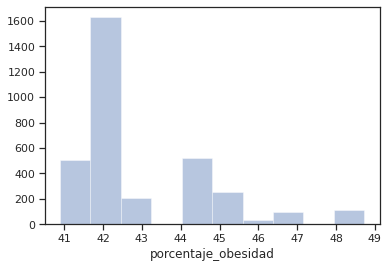

In [ ]:
sns.set(style='ticks')
sns.distplot(df_filtrado_po['porcentaje_obesidad'], kde=False, norm_hist=False, bins=10);

In [ ]:
df_filtrado_po_value = df_filtrado_po['porcentaje_obesidad']

Ahora vamos a analizar dos parámetros que nos permiten describir mejor nuestros datos:

**a) ASIMETRÍA:** Comprobamos que la asimetría es positiva, tal como lo vimos en el histograma, es decir, la cola de la derecha es más larga que la cola de la izquierda.

**b) CURTOSIS:** En este caso tenemos una curtosis positiva (Platicúrtica) lo cual nos indica que nuestra distribución está achatada, es decir, hay mayor dispersión de nuestros datos (más lejanos de nuestro punto central) y por lo tanto tenemos colas largas.

In [ ]:
print(f'Curtosis: {kurtosis(df_filtrado_po_value)}')
print(f'Asimetría: {skew(df_filtrado_po_value)}')

Curtosis: 1.5458787536401752
Asimetría: 1.388049143702127


## Número de ventas en millones de pesos por Municipio

**BOXPLOT**

* Podemos observar que dentro del rango total de datos, tenemos una distribución que tiende hacia los valores de la media (línea amarilla).
* Podemos visualizar que nuestros datos en general están poco dispersos, pero sí hay valores que se extienden a la derecha.

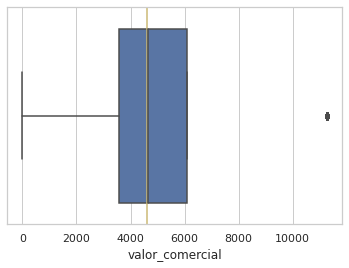

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=nuevo_leon_poi['valor_comercial'])
plt.axvline(nuevo_leon_poi['valor_comercial'].mean(), c='y')

**SCORE DE RANGO INTERCUARTÍLICO**

VALORES ATÍPICOS: Podemos observar que a pesar de tener alguno valores atípicos tan extremos, tenemos bastante valores concentrados que hacen que el promedio sea cercano a la mediana.

Sin embargo, estos valores atípicos de la derecha no los vamos a eliminar utilizando el SCORE de Rango Intercuartílico (IQR-Score) debido a que nos interesa conservar esto datos atípicos, ya que es importante conocer las locaciones con mayores ventas en millones de pesos.

**TABLAS DE FRECUENCIA**

In [ ]:
valor_comercial = nuevo_leon_poi['valor_comercial']
valor_comercial.max() - valor_comercial.min()

11257.306956999997

Tenemos una tabla donde los índices son los 20 rangos en los que se dividió nuestro dataset y los valores de la tabla son los conteos de cada agrupación. De esta manera quedan aún en más evidencia los valores atípicos, ya que podemos ver que hacia la derecha, en el úlimo segmento, se encuentran estos valores.

In [ ]:
segmentos = pd.cut(valor_comercial, 20)

In [ ]:
nuevo_leon_poi['valor_comercial'].groupby(segmentos).count()

valor_comercial
(-11.056, 563.067]         515
(563.067, 1125.932]         52
(1125.932, 1688.798]       208
(1688.798, 2251.663]         0
(2251.663, 2814.528]        50
(2814.528, 3377.394]        87
(3377.394, 3940.259]       411
(3940.259, 4503.124]         0
(4503.124, 5065.99]        560
(5065.99, 5628.855]          0
(5628.855, 6191.72]       1578
(6191.72, 6754.586]          0
(6754.586, 7317.451]         0
(7317.451, 7880.316]         0
(7880.316, 8443.182]         0
(8443.182, 9006.047]         0
(9006.047, 9568.913]         0
(9568.913, 10131.778]        0
(10131.778, 10694.643]       0
(10694.643, 11257.509]     234
Name: valor_comercial, dtype: int64

**HISTOGRAMAS**

En el histograma podemos ver a simple vista que tenemos posiblemente una distribución Cola Larga debido a que hay valores que se extienden mucho hacia los lados a partir del punto central.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



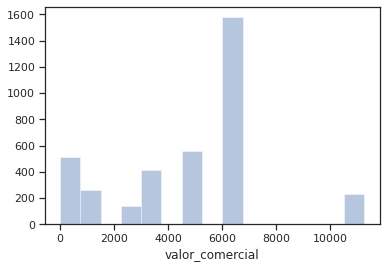

In [ ]:
sns.set(style='ticks')
sns.distplot(nuevo_leon_poi['valor_comercial'], kde=False, norm_hist=False, bins=15);

Ahora vamos a analizar dos parámetros que nos permiten describir mejor nuestros datos:

**a) ASIMETRÍA:** Extrañamente la asimetría es positiva, es decir, se tiene una cola de la derecha es más larga que la cola de la izquierda.

**b) CURTOSIS:** En este caso tenemos una curtosis positiva (Platicúrtica) lo cual nos indica que nuestra distribución está achatada, es decir, hay mayor dispersión de nuestros datos (más lejanos de nuestro punto central) y por lo tanto tenemos colas largas.

Sin embargo, debido a que conservamos los valores atípicos de la derecha, es posible que que los valores de la asimetría y la curtosis se hayan visto afectados y tengan valores muy cercanos a cero, indicando que se tiene una distribución con tendencia a la normal.

In [ ]:
df_filtrado_vc_value = df_filtrado_po['valor_comercial']

In [ ]:
print(f'Curtosis: {kurtosis(df_filtrado_vc_value)}')
print(f'Asimetría: {skew(df_filtrado_vc_value)}')

Curtosis: 0.0566404758834107
Asimetría: 0.14540399236569115


## Concentración de tiendas por Municipio

**BOXPLOT**

* Podemos observar que dentro del rango total de datos, tenemos una distribución que tiende hacia los valores de la media (línea amarilla).
* Podemos visualizar que no tenemos valores atípicos, por lo cual no será necesario eliminarlos a partir del Score de Rango Intercuartílico

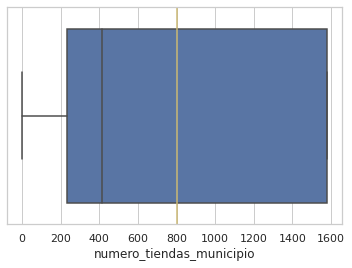

In [ ]:
sns.set(style="whitegrid")
sns.boxplot(x=nuevo_leon_poi['numero_tiendas_municipio'])
plt.axvline(nuevo_leon_poi['numero_tiendas_municipio'].mean(), c='y')

**TABLAS DE FRECUENCIA**

In [ ]:
numero_tiendas_municipio = nuevo_leon_poi['numero_tiendas_municipio']
numero_tiendas_municipio.max() - numero_tiendas_municipio.min()

1577

Tenemos una tabla donde los índices son los 12 rangos en los que se dividió nuestro dataset y los valores de la tabla son los conteos de cada agrupación. De esta manera quedan aún en más evidencia los valores atípicos, ya que podemos ver que hacia la derecha, en el úlimo segmento, se encuentran estos valores.

In [ ]:
segmentos = pd.cut(numero_tiendas_municipio, 12)

In [ ]:
nuevo_leon_poi['numero_tiendas_municipio'].groupby(segmentos).count()

numero_tiendas_municipio
(-0.577, 132.417]        704
(132.417, 263.833]       689
(263.833, 395.25]        313
(395.25, 526.667]        411
(526.667, 658.083]         0
(658.083, 789.5]           0
(789.5, 920.917]           0
(920.917, 1052.333]        0
(1052.333, 1183.75]        0
(1183.75, 1315.167]        0
(1315.167, 1446.583]       0
(1446.583, 1578.0]      1578
Name: numero_tiendas_municipio, dtype: int64

**HISTOGRAMAS**

En el histograma podemos ver a simple vista que tenemos posiblemente una distribución Cola Larga debido a que hay valores que se extienden mucho hacia los lados a partir del punto central.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



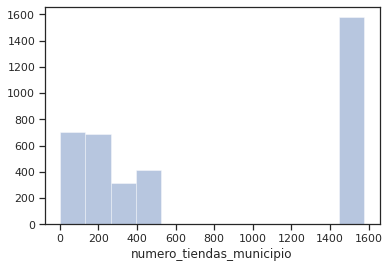

In [ ]:
sns.set(style='ticks')
sns.distplot(nuevo_leon_poi['numero_tiendas_municipio'], kde=False, norm_hist=False, bins=12);

Ahora vamos a analizar dos parámetros que nos permiten describir mejor nuestros datos:

**a) ASIMETRÍA:** la asimetría es positiva, es decir, se tiene una cola de la derecha es más larga que la cola de la izquierda.

**b) CURTOSIS:** En este caso tenemos una curtosis negativa (Leptocúrtica) lo cual nos indica que nuestra distribución está escarpada, es decir, hay menos dispersión de nuestros datos, ya que están más cercanos a nuestro punto central. Aunque no es que no haya tanta dispersión, sino que los datos se encuentran alejados a una distancia similar del punto central.

In [ ]:
df_filtrado_ntm_value = df_filtrado_po['numero_tiendas_municipio']

In [ ]:
print(f'Curtosis: {kurtosis(df_filtrado_ntm_value)}')
print(f'Asimetría: {skew(df_filtrado_ntm_value)}')

Curtosis: -1.9206444016955224
Asimetría: 0.06324266522768807


### Crosstab, Tablas de contingencia - Graficando múltiples axis


Realizamos crosstabs y múltiples gráficas con subplots para hacer comparaciones de nuestros datos.

**CANTIDAD DE PERSONAL VS TIPO DE VIALIDAD**

Realizamos un cruce entre el tipo de vialidad y la cantidad de personal. Podemos observar que la mayoría de las tiendas se encuentran en un tipo de vialidad de "calle" y "avenida" en donde el estrato más común es de 0 a 5 personas, seguido de 6 a 10 personas. Por lo que podemos observar que la gran mayoría de tiendas tiene número de personal no muy alto.

In [ ]:
pd.crosstab(nuevo_leon_poi['cantidad_personal'], nuevo_leon_poi['tipo_vialidad'])

tipo_vialidad,ANDADOR,AVENIDA,BOULEVARD,CALLE,CALLEJON,CALZADA,CARRETERA,CIRCUITO,OTRO (ESPECIFIQUE),PASAJE,PEATONAL,PRIVADA,PROLONGACION
cantidad_personal,,,,,,,,,,,,,
0 a 5 personas,84,1057,20,2021,4,48,22,1,4,6,8,9,13
101 a 250 personas,0,4,0,2,0,0,0,0,0,0,0,0,0
11 a 30 personas,4,55,0,50,0,6,5,0,0,0,2,0,1
251 y más personas,0,0,0,1,0,0,1,0,0,0,0,0,0
31 a 50 personas,1,9,0,15,0,2,2,0,0,0,0,0,0
51 a 100 personas,0,21,0,5,0,0,4,0,0,0,0,0,0
6 a 10 personas,3,92,1,87,0,6,6,0,0,0,9,1,3


**CANTIDAD DE PERSONAL VS SECTOR DE TIENDA**

Ahora realizamos un cruce entre el sector tienda y la cantidad personal. Podemos observar nuevamente que la cantidad de personal más común es la de 0 a 5 personas, mientras que los sectores de tienda más comunes son:
* Comercio al por menor de ropa, excepto de bebé y lencería, ocupando el 64.86% del mercado
* Comercio al por menor de artículos usados, ocupando el 6.96% del mercado
* Comercio al por menor de ropa de cuero y piel y de otros artículos de estos materiales, ocupando el 4.95% del mercado



In [ ]:
pd.crosstab(nuevo_leon_poi['cantidad_personal'], nuevo_leon_poi['sector_tienda'])

sector_tienda,Alquiler de prendas de vestir,Comercio al por mayor de artículos y aparatos deportivos,Comercio al por mayor de calzado,"Comercio al por mayor de maquinaria y equipo agropecuario, forestal y para la pesca","Comercio al por mayor de ropa, bisutería y accesorios de vestir","Comercio al por menor de alfombras, cortinas, tapices y similares",Comercio al por menor de artículos de mercería y bonetería,Comercio al por menor de artículos de papelería,Comercio al por menor de artículos de perfumería y cosméticos,Comercio al por menor de artículos usados,Comercio al por menor de artículos y aparatos deportivos,Comercio al por menor de bisutería y accesorios de vestir,Comercio al por menor de calzado,"Comercio al por menor de disfraces, vestimenta regional y vestidos de novia",Comercio al por menor de frutas y verduras frescas,Comercio al por menor de juguetes,Comercio al por menor de lencería,Comercio al por menor de lentes,Comercio al por menor de muebles para el hogar,Comercio al por menor de otros artículos de uso personal,Comercio al por menor de plantas y flores naturales,"Comercio al por menor de productos naturistas, medicamentos homeopáticos y de complementos alimenticios",Comercio al por menor de regalos,Comercio al por menor de ropa de bebé,Comercio al por menor de ropa de cuero y piel y de otros artículos de estos materiales,"Comercio al por menor de ropa, excepto de bebé y lencería",Comercio al por menor de sombreros,"Comercio al por menor en tiendas de abarrotes, ultramarinos y misceláneas",Comercio al por menor en tiendas de artesanías,Confección de otros accesorios y prendas de vestir no clasificados en otra parte,Confección de prendas de vestir sobre medida,Confección en serie de disfraces y trajes típicos,Confección en serie de otra ropa exterior de materiales textiles,Confección en serie de ropa interior y de dormir,Confección en serie de uniformes,"Confección, bordado y deshilado de productos textiles",Fabricación de material desechable de uso médico,Fabricación de ropa exterior de tejido de punto,Lavanderías y tintorerías,Reparación de calzado y otros artículos de piel y cuero,Reparación y mantenimiento de otros artículos para el hogar y personales,"Servicios de fotocopiado, fax y afines"
cantidad_personal,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0 a 5 personas,6,1,1,1,36,1,5,6,8,229,24,9,16,4,1,2,5,1,1,1,1,1,7,82,196,2381,1,2,12,1,9,1,89,2,7,1,0,5,8,4,128,1
101 a 250 personas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0
11 a 30 personas,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,81,0,0,0,0,0,0,29,1,0,0,0,0,0,0,0,0
251 y más personas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
31 a 50 personas,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0,0,0,9,0,0,0,0,2,0,0,0,0
51 a 100 personas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
6 a 10 personas,1,0,0,0,9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,7,11,161,0,0,0,0,0,0,15,2,0,0,1,0,0,0,0,0


**DIMESIÓN DE TIENDA VS RATING**

Hacemos un cruce entre el rating y la dimensión de la tienda. Podemos observar nuevamente que cuando podemos identificar el tamaño de la tienda, las C (Pequeña) tienen el rating más alto, lo mismo pasa con las dimensiones de tienda sin especificar, en donde se tiene la calificación más alta. 

Seguramente esto sucede debido a que las tiendas más grandes tienen mayor número de calificaciones por lo que este rating se promedia, siendo el más común de las tiendas de tamaño grande (A) el valor de 4.3

In [ ]:
nuevo_leon_poi_nocero =  nuevo_leon_poi.loc[(nuevo_leon_poi['rating'] != 0.0)] # Quitamos los 0.0 porque son tiendas a las cuales no se les ha asignado un rating
crosstab = pd.crosstab(nuevo_leon_poi_nocero['dimension_tienda'], nuevo_leon_poi_nocero['rating'])
crosstab

rating,1.0,1.3,1.4,2.0,2.3,2.4,2.6,2.8,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0
dimension_tienda,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,2,5,8,1,3,2,0,3,0,0
B,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,2,2,0,0,1,9,7,3,4,1,3,1,0,0
C,0,1,4,1,6,0,0,0,7,1,1,2,1,5,4,7,11,2,36,23,27,44,28,31,34,24,16,8,61
Sin especificar,11,0,0,1,3,2,3,3,11,2,1,20,3,5,5,27,21,11,89,66,47,84,80,86,55,45,34,19,165


Podemos ver a través de una gráfica de barras y una gráfica de densidad la comparación de la variable de rating que es segmentada por la dimensión de la tienda.

En el caso de la dimension de la tienda C y sin especificar podemos ver que los datos se encuentran mucho más dispersos.

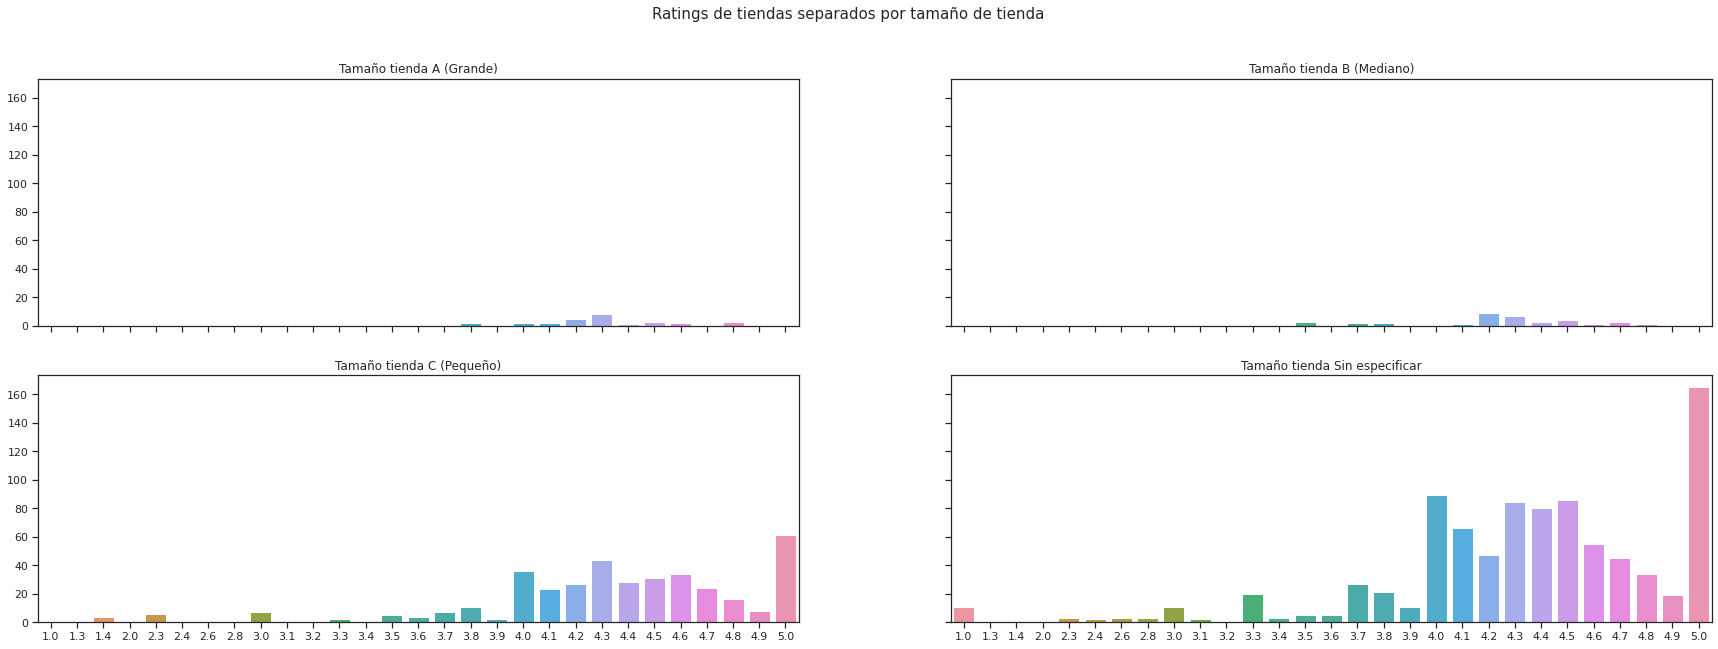

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(30, 10), sharex=True, sharey=True) 

sns.barplot(x = crosstab.columns, y = crosstab.loc['A'], ax=axes[0, 0])
sns.barplot(x = crosstab.columns, y = crosstab.loc['B'], ax=axes[0, 1])
sns.barplot(x = crosstab.columns, y = crosstab.loc['C'], ax=axes[1, 0])
sns.barplot(x = crosstab.columns, y = crosstab.loc['Sin especificar'], ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='Tamaño tienda A (Grande)')
axes[0, 1].set(xlabel='', ylabel='', title='Tamaño tienda B (Mediano)')
axes[1, 0].set(xlabel='', ylabel='', title='Tamaño tienda C (Pequeño)')
axes[1, 1].set(xlabel='', ylabel='', title='Tamaño tienda Sin especificar')

fig.suptitle('Ratings de tiendas separados por tamaño de tienda', fontsize=15);

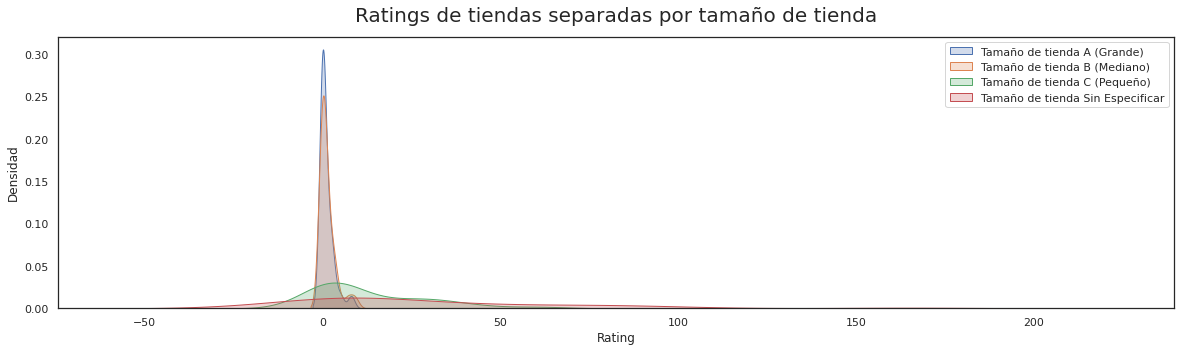

In [ ]:
sns.set(style='white')

fig, axes = plt.subplots(figsize=(20, 5)) 

sns.kdeplot(crosstab.loc['A'], shade=True, label='Tamaño de tienda A (Grande)')
sns.kdeplot(crosstab.loc['B'], shade=True, label='Tamaño de tienda B (Mediano)')
sns.kdeplot(crosstab.loc['C'], shade=True, label='Tamaño de tienda C (Pequeño)');
sns.kdeplot(crosstab.loc['Sin especificar'], shade=True, label='Tamaño de tienda Sin Especificar');

axes.set_title('Ratings de tiendas separadas por tamaño de tienda', fontsize=20, pad=15)
axes.set(xlabel='Rating', ylabel='Densidad');
axes.legend(loc='upper right');

**MODA**

Ahora obtenemos la MODA de nuestro rating, podemos ver que el valor que más se repite es el 5.0, pero como lo mencionabamos antes, es probable que este valor lo tengan tiendas de tamaño pequeño que tengan un número de evaluaciones de rating muy bajo, es decir, no lo han calificado muchos usuarios. Veamos si esto es cierto.


In [ ]:
nuevo_leon_poi_nocero['rating'].mode()

0    5.0
dtype: float64

Podemos ver que ninguna tienda de dimensión A y B tienen una calificación perfecta de 5.0

In [ ]:
nuevo_leon_poi_nocero.loc[((nuevo_leon_poi_nocero['dimension_tienda'] == 'A') | (nuevo_leon_poi_nocero['dimension_tienda'] == 'B')) & (nuevo_leon_poi_nocero['rating'] == 5.0)]

,nombre_tienda,razon_social,sector_tienda,cantidad_personal,tipo_vialidad,calle,num_exterior,num_interior,colonia,codigo_postal,ubicacion,telefono,correo,pagina_web,longitud,latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,municipio,dimension_tienda,porcentaje_obesidad,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,place_id,categoria,popularidad_actual,horarios_populares,rating,rating_numero,horarios_populares_dias,tiempo_espera


En el caso de las tiendas con dimensión C y Sinespecificar sí podemos ver que 226 tiendas tienen una calificación perfecta de 5.0

In [ ]:
numero_rating = nuevo_leon_poi_nocero.loc[((nuevo_leon_poi_nocero['dimension_tienda'] == 'C') | (nuevo_leon_poi_nocero['dimension_tienda'] == 'Sin especificar')) & (nuevo_leon_poi_nocero['rating'] == 5.0)]
numero_rating

,nombre_tienda,razon_social,sector_tienda,cantidad_personal,tipo_vialidad,calle,num_exterior,num_interior,colonia,codigo_postal,ubicacion,telefono,correo,pagina_web,longitud,latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,municipio,dimension_tienda,porcentaje_obesidad,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,place_id,categoria,popularidad_actual,horarios_populares,rating,rating_numero,horarios_populares_dias,tiempo_espera
48,Acid insignia,ACID INSIGNIA,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,CALLE,RIO MANZANARES,325,0,HUDSON,66220,"SAN PEDRO GARZA GARCÍA, San Pedro Garza García...",0.000000e+00,Sin especificar,Sin especificar,-100.360918,25.656135,Sin especificar,Sin especificar,Sin especificar,San Pedro Garza Garcia,Sin especificar,35.1730,4634.679777,247,3,ChIJeSIqOHm9YoYR2eGIq4vfwKI,['Clothing store'],0,Sin especificar,5.0,2.0,Sin especificar,Sin especificar
52,Adrenalina,Sin especificar,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,CALLE,FRAY SERVANDO TERESA DE MIER,101,206,CENTRO DE MONTERREY,64000,"MONTERREY, Monterrey, NUEVO LEÓN",0.000000e+00,Sin especificar,Sin especificar,-100.315090,25.668520,EDIFICIO COMERCIAL Y DE SERVICIOS,SHOPTOWN INTER PLAZA,206,Monterrey,C,42.2707,6098.849922,1578,271,ChIJty98Qy--YoYRt07mTSBgQHA,['Clothing store'],0,Sin especificar,5.0,2.0,Sin especificar,Sin especificar
56,Agent anouck,Sin especificar,Confección en serie de otra ropa exterior de m...,0 a 5 personas,CALLE,HERMENEGILDO GALEANA,450,0,SAN PEDRO GARZA GARCIA CENTRO,66230,"SAN PEDRO GARZA GARCÍA, San Pedro Garza García...",8.112438e+09,ALENUKA@HOLMAIL.COM,Sin especificar,-100.407670,25.662097,Sin especificar,Sin especificar,Sin especificar,San Pedro Garza Garcia,Sin especificar,35.1730,4634.679777,247,1,ChIJ68PTgHy9YoYR7dTL2sMjTzA,['Clothing store'],0,"[[7, None, 1], [1, None, 0], [2, [[6, 0, '', '...",5.0,8.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...",Sin especificar
66,Alboroto,Sin especificar,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,AVENIDA,PABLO LIVAS,2500,0,FRACC VILLA CONTRY,67170,"GUADALUPE, Guadalupe, NUEVO LEÓN",0.000000e+00,Sin especificar,Sin especificar,-100.235459,25.669037,CENTRO Y PLAZA COMERCIAL,MIRADOR 2500,2500,Guadalupe,Sin especificar,44.3291,3562.483031,411,3,ChIJVdqMMj3AYoYRwbw5gC_3C0k,['Boutique'],0,Sin especificar,5.0,1.0,Sin especificar,Sin especificar
103,Ana de la fuente,ANA DE LA FUENTE,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,AVENIDA,ROBERTO GARZA SADA,235,0,ROBERTO GARZA ZADAQ,66256,"SAN PEDRO GARZA GARCÍA, San Pedro Garza García...",0.000000e+00,Sin especificar,Sin especificar,-100.380797,25.638502,Sin especificar,Sin especificar,Sin especificar,San Pedro Garza Garcia,Sin especificar,35.1730,4634.679777,247,1,ChIJXyZaDU69YoYR7vR77t4q25M,['Clothing store'],0,Sin especificar,5.0,2.0,Sin especificar,Sin especificar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,Vestidos de sabinas,Sin especificar,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,CALLE,JUAN NEPOMUCENO MENDEZ,1104,0,ZONA CENTRO,64000,"MONTERREY, Monterrey, NUEVO LEÓN",8.183720e+09,ALICIAMORALESSALAZAR@HOTMAIL.COM,Sin especificar,-100.315144,25.685166,Sin especificar,Sin especificar,Sin especificar,Monterrey,C,42.2707,6098.849922,1578,189,ChIJj14KQoWVYoYRRCMZ7EF9HRE,['Dress store'],0,Sin especificar,5.0,1.0,Sin especificar,Sin especificar
3649,Vo boutique,Sin especificar,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,CALLE,N7,186,0,METROPLEX,66612,"CIUDAD APODACA, Apodaca, NUEVO LEÓN",0.000000e+00,Sin especificar,Sin especificar,-100.253778,25.789386,Sin especificar,Sin especificar,Sin especificar,Apodaca,Sin especificar,45.3691,11257.508571,234,5,ChIJXWs5W7HsYoYRGI4of458NjA,"['Boutique', 'Clothing store']",0,Sin especificar,5.0,1.0,Sin especificar,Sin especifi

Veamos cuales son los valores máximos y mínimos, percentiles, así como la media, mediana y desviación estándar.
Efectivamente estabamos en lo cierto, las tiendas de estas dimensiones tienen casi una calificación perfecta porque el número de ratings que han hecho los usarios son muy pocos, la mediana es tan solo de dos. 

Eso sí, existen una tienda con 75 evaluaciones de ratings que sí conserva un valor de 5.0, pero se puede considerar como un valor atípico.

In [ ]:
numero_rating['rating_numero'].agg(['mean', 'median', 'std'])

mean      3.057522
median    2.000000
std       5.553878
Name: rating_numero, dtype: float64

In [ ]:
print(f'Valor mínimo: {numero_rating["rating_numero"].min()}')
print(f'Percentil 10: {numero_rating["rating_numero"].quantile(0.1)}')
print(f'Percentil 25: {numero_rating["rating_numero"].quantile(0.25)}')
print(f'Percentil 50: {numero_rating["rating_numero"].quantile(0.50)}')
print(f'Percentil 75: {numero_rating["rating_numero"].quantile(0.75)}')
print(f'Percentil 90: {numero_rating["rating_numero"].quantile(0.9)}')
print(f'Valor máximo: {numero_rating["rating_numero"].max()}')

Valor mínimo: 1.0
Percentil 10: 1.0
Percentil 25: 1.0
Percentil 50: 2.0
Percentil 75: 3.0
Percentil 90: 6.0
Valor máximo: 75.0


**MUNICIPIO VS CANTIDAD DE PERSONAL VS DIMENSION DE TIENDA**

También podemos hacer un cruce entre tres variables, en este caso el municipio, la dimension de la tienda y la cantidad de personal.

De esta forma podemos ver, por ejemplo, que en el municipio de Allende es más común encontrar tiendas de dimension sin especificar y con una cantidad de empleados de 0 a 5 personas.

In [ ]:
crosstab = pd.crosstab(nuevo_leon_poi['municipio'], [nuevo_leon_poi['cantidad_personal'], nuevo_leon_poi['dimension_tienda']])

In [ ]:
stack_level_1 = crosstab.stack(level=1) # indicamos que convierta 'dimension_tienda' en el índice
stack_level_1 

cantidad_personal                0 a 5 personas  ...  6 a 10 personas
municipio      dimension_tienda                  ...                 
Allende        A                              0  ...                0
               B                              0  ...                0
               C                             13  ...                0
               Sin especificar               49  ...                1
Apodaca        A                              0  ...                0
...                                         ...  ...              ...
Santa Catarina Sin especificar               64  ...                2
Santiago       A                              0  ...                0
               B                              0  ...                0
               C                             12  ...                0
               Sin especificar               36  ...                1

[76 rows x 7 columns]

In [ ]:
# Podemos buscar el Municipio que necesitemos, por ejemplo, Geeneral Escobedo
stack_level_1.loc['General Escobedo']

cantidad_personal,0 a 5 personas,101 a 250 personas,11 a 30 personas,251 y más personas,31 a 50 personas,51 a 100 personas,6 a 10 personas
dimension_tienda,,,,,,,
A,1,0.0,1,NaN,NaN,1.0,1
B,0,NaN,1,NaN,0.0,1.0,1
C,41,NaN,0,NaN,0.0,NaN,0
Sin especificar,152,0.0,2,0.0,0.0,0.0,6


### Boxplots y Violinplots

Podemos utilizar cuatro Boxplots paralelos, ya que tenemos una vaiable categórica (La dimensión de la tienda) y una variable numérica (el número de ratings). 
Se generarán 4 boxplots ya que los valores posibles de la dimensión de las tiendas son: A (Grande), B (Mediana), C (Pequeña) y Sin especificar.

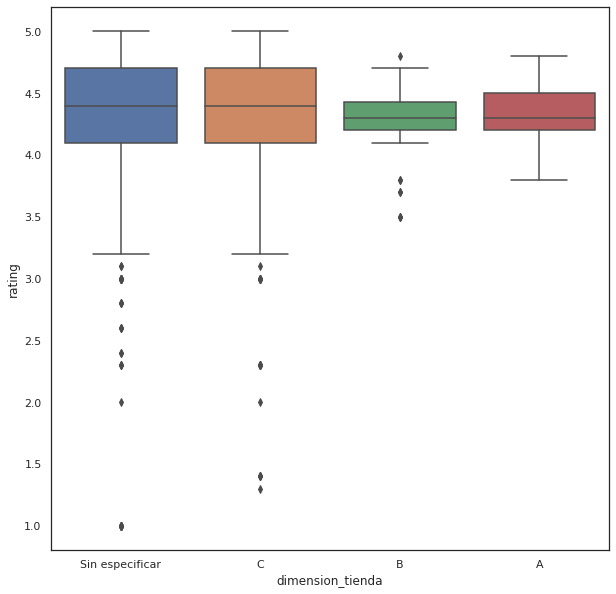

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=nuevo_leon_poi_nocero, x='dimension_tienda', y='rating');

Ahora, las anteriores gráficas también las podemos realizar usando un violinplot, que se caracteriza por graficar estimados de densidad. Nos permite ver de mejor manera como se distribuyen los datos, tal como en las gráficas de densidar. 

Por ejemplo, podemos ver que las tiendas con dimensión A y B tienen un rating que se acerca al valor de 4, muy cerca del punto blanco que indica la mediana. 

En el caso de las tiendas con dimensión C y Sin especificar, los datos se distribuyen más uniformemente, teniendo incluso varios valores atípicios que van desde el 1 al 3. No obstante los datos más comunes están entre el 4 y el 5.

La pildora negra nos muestra los percentiles 25 y 75 y la linea negra media nos muestra el IQR, sin embargo, una desventaja de este tipo de diagramas es que no podemos ver muy claro los valores atípico (como sí podemos verlos en el boxplot.

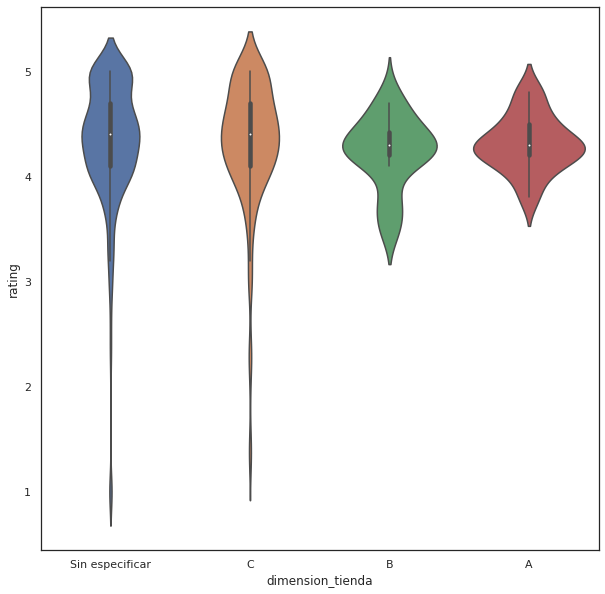

In [ ]:
plt.figure(figsize=(10, 10))
sns.violinplot(data=nuevo_leon_poi_nocero, x='dimension_tienda', y='rating');

# Análisis de colores más comunes de prendas vendidas en un mercado en línea**

Se cuenta con una recopilación de una base de datos de distintas prendas de ropa vendidas en plataformas de internet. Se muestran distintas características de dichas prendas. Se realiza un análisis de dichas prendas para conocer cuáles son los colores de prendas mayormente vendidos en el mercado.


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/MaasWaffen/Datasets/main/summer-products-with-rating-and-performance_2020-08.csv')
data.drop_duplicates(inplace=True)


Análizamos cuatos colores de prendas o combinacion de ellos existen dentro de la base de datos.

In [ ]:
len(set(data['product_color']))

102

Realizamos un mapa de calor de todas las variables numéricas presentes en el dataframe con el objetivo de ver si existe alguna dependencia lineal del número de elementos vendidos con alguna de las variables.

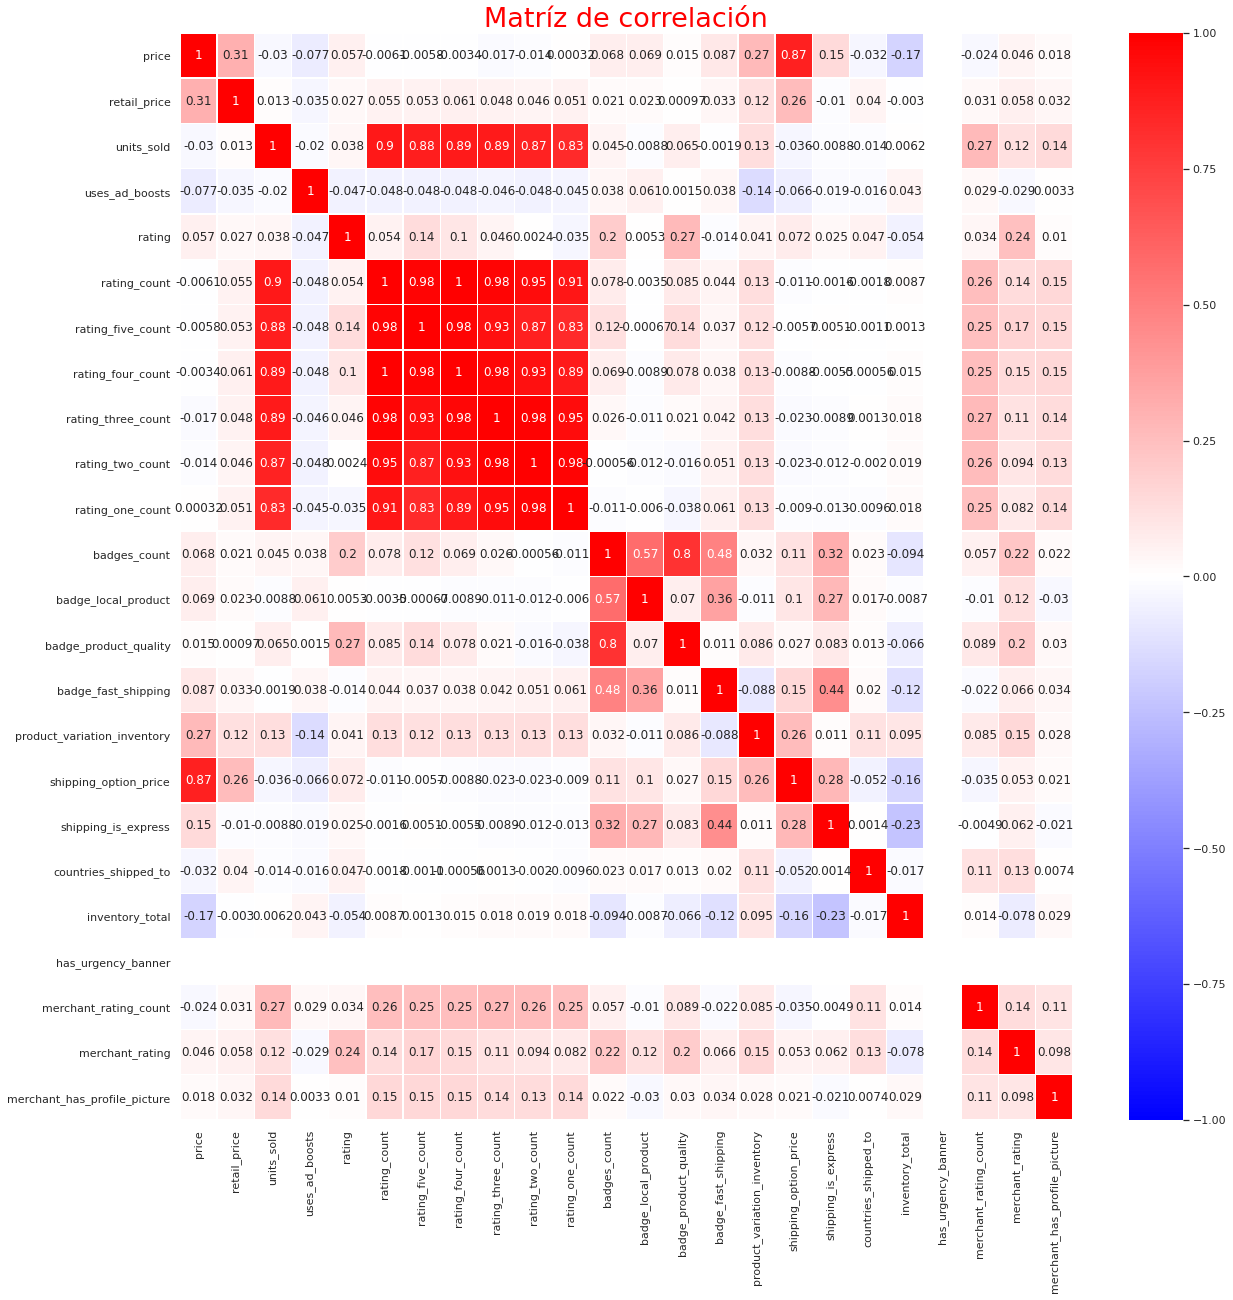

In [ ]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="bwr", linewidths=.5);  sns.set_style('whitegrid');
plt.title('Matríz de correlación',fontsize=27, ha="center", color='red');

Inspeccionando todo el dataframe nos damos cuenta de que las varibles no comparten una correlación casi nula con el número de prendas vendidos. Por lo general todas andan en valores por debajo de 0.1, sin embargo descubrimos una variables que tiene una correlación posistiva realacionada con el número de prendas vendidas. Dicha variables es "merchant_raiting_count", dicha variables presenta una correlación positiva de 0.27. Bien sabemos que es muy baja, no obstante si la comparamos con todos los demás valores de la matríz de correlación del mapa de calor, nos damos cuenta que mínimo es algo a nivel dataframe. Por lo que creemos que si filtramos el dataset de valores atípicos de la media de dicha variable de interés, podemos aumentar dicha correlación.

Visualizamos los datos con un diagrama de caja para visualizar los valores atípicos de nuestro dataframe.

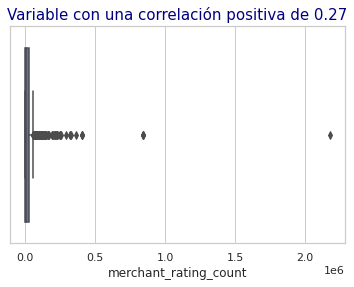

In [ ]:
d_ob = data['merchant_rating_count']
sns.boxplot(x=d_ob); sns.set_style('whitegrid')
plt.title('Variable con una correlación positiva de 0.27',fontsize=15, ha="center", color='Navy');

Realizamos el filtrado de los valores atípicos de la variable con correlación positiva y lo aplicamos a los datos generales.

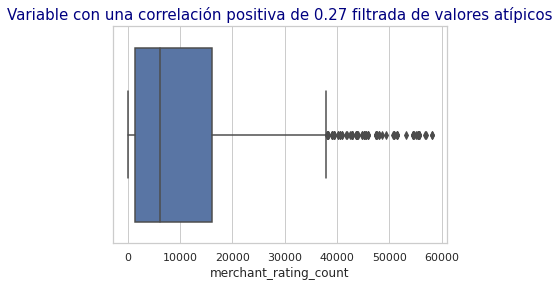

In [ ]:
iqr = d_ob.quantile(0.75) - d_ob.quantile(0.25)
filtro_inferior = d_ob > d_ob.quantile(0.25) - (iqr * 1.5)
filtro_superior = d_ob < d_ob.quantile(0.75) + (iqr * 1.5)

data_filtrado = data[filtro_inferior & filtro_superior]
sns.boxplot(x=data_filtrado['merchant_rating_count']); sns.set_style('whitegrid')
plt.title('Variable con una correlación positiva de 0.27 filtrada de valores atípicos',fontsize=15, ha="center", color='Navy');

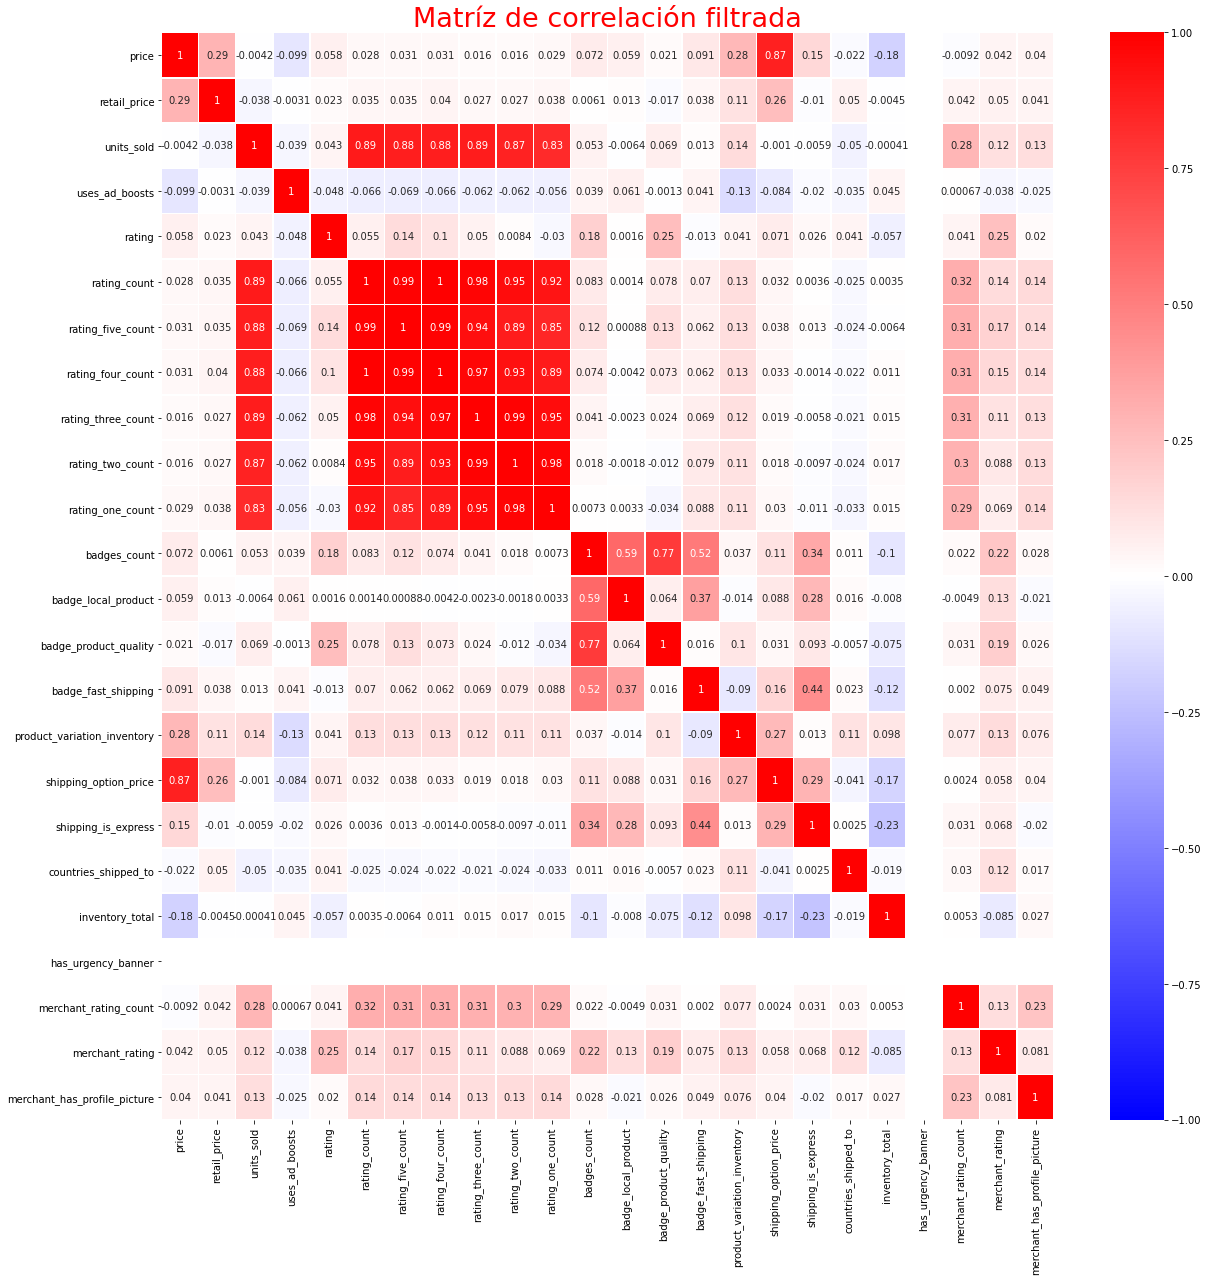

In [ ]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(data_filtrado.corr(), vmin=-1, vmax=1, annot=True, cmap="bwr", linewidths=.5);
plt.title('Matríz de correlación filtrada',fontsize=27, ha="center", color='red');

El realizar dicho filtrado solamente aumento la correlación de 0.27 a 0.28, muy poco y además provocó que otras correlaciones disminuyeran. Por lo que se considera que quitar los valores atípocos con base en la variable "merchant_raiting_count" NO ES NECESARIO.

Para enlistar los colores más comunes de ropa vendidos en la base de datos realizamos una tabla de conteo para cada color.

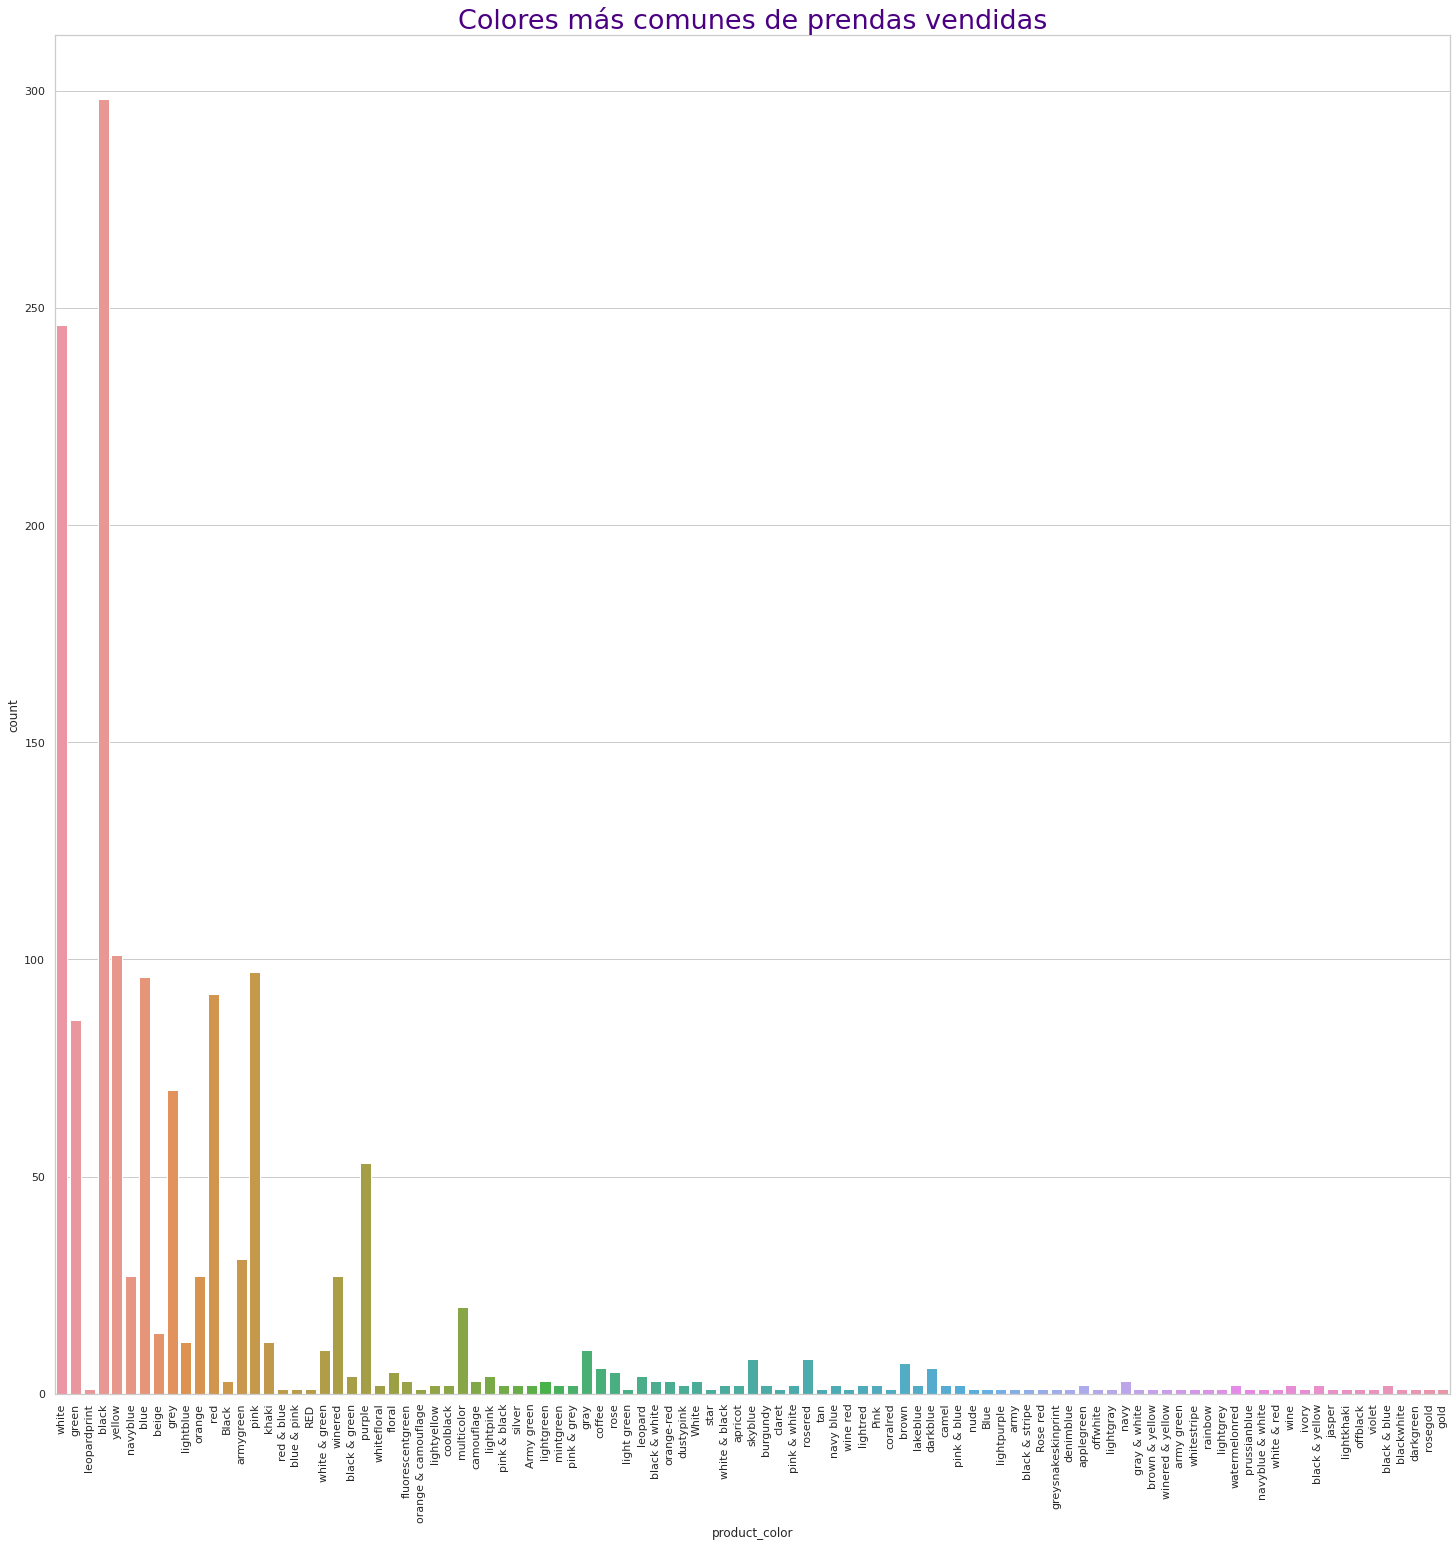

In [ ]:
plt.figure(figsize=(25, 25))
sns.set_theme(style="darkgrid"); sns.set_style('whitegrid')
ax = sns.countplot(x='product_color', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
plt.title('Colores más comunes de prendas vendidas',fontsize=27, ha="center", color='indigo');

Visualizamos los valores atípicos de la categoría "product_color".

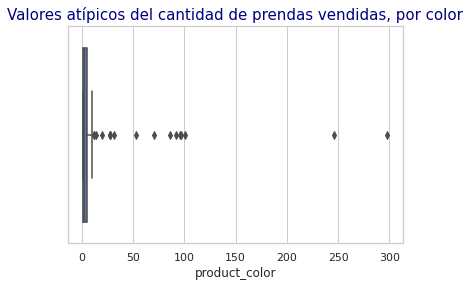

In [ ]:
sns.boxplot(x=data['product_color'].value_counts()); sns.set_style('whitegrid');
plt.title('Valores atípicos del cantidad de prendas vendidas, por color',fontsize=15, ha="center", color='Navy');

En este caso podemos darnos cuenta que los valores atípicos están muy lejanos de la mediana calculada, sin embargo para este caso lo que nos interesa son los valores atípicos, los valores cercanos a la mediana NO NOS INTERESAN. Esto sucede porque los valores atípicos son aquellas cantidades o colores que acumularon mayor cantidad de datos por color, debido a que contamos con 102 variaciones de colores y la mayoría de prendas vendidas por color oscila de 1 a 5 prendas, por razones claras la mediana de prendas del dataset será de 2 a 5 prendas y se encontrarán dentro del boxplot, es por eso que como queremos saber los colores en donde superan el promedio, seleccionamos los valores atípicos y no los valores promedio. En este caso gracias a la gráfica pudimos hacer un cálculo que por arriba de 25 prendas sería lo ideal a filtrar de los colores.

In [ ]:
data['product_color'].value_counts()[data['product_color'].value_counts() > 25]

black        298
white        246
yellow       101
pink          97
blue          96
red           92
green         86
grey          70
purple        53
armygreen     31
winered       27
navyblue      27
orange        27
Name: product_color, dtype: int64

Gracias es este análisis pudimos darnos cuenta que los colores mas vendidos son los monocromáticos encabezados por el negro, blanco, amarillo, rosa, azul etc. Gracias a este análisis podemos saber qué colores comerciar en nuestra tienda de ropa.

# Postwork 5 Distribuciones muestrales y técnicas de evaluación de modelos.

##**Tendencia lineal de obesidad en México**

Se recopiló una base datos de los porcentajes de obesidad en méxico desde el año 1975 a 2016. y se realiza una regresión lineal con la librería skilearn y se genera un modelo con los datos de entrenamiento, para generar una predicción empleando los datos de prueba. Las relaciones empleadas entre prueba y entrenamiento es 80%,20%.

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/MaasWaffen/Datasets/main/Peso.csv')
sns.set_style('whitegrid')
data_mex = data2[data2['Code'] == 'MEX']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = data_mex[['Year']]
y = data_mex['Prevalence of overweight adults (both sexes) - WHO (2019)']
X_training, X_test, y_training, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)
lr = LinearRegression()
lr.fit(X_training, y_training)
lr.score(X_test,y_test)
y_predict = lr.predict(X_test)

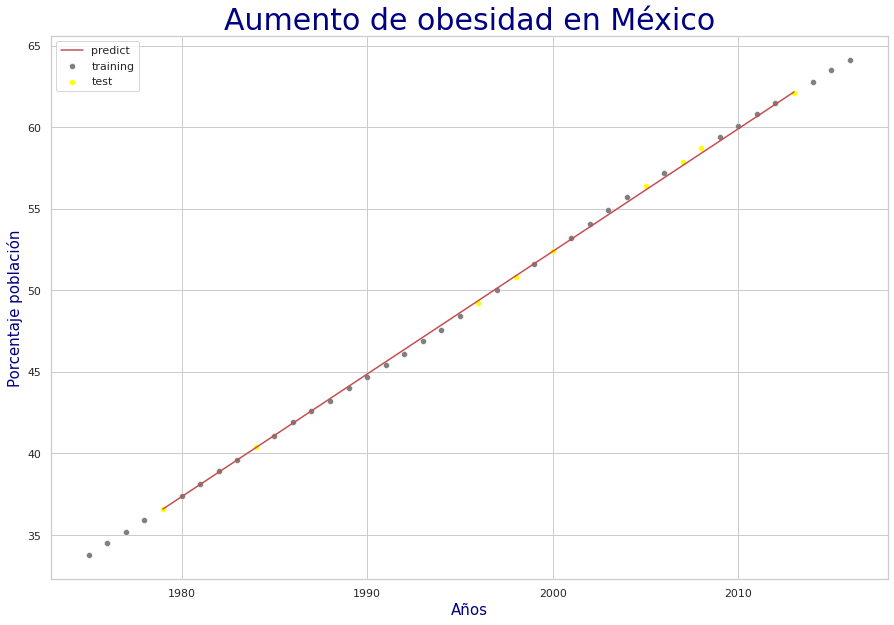

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x=X_training['Year'],y=y_training,color='gray');
sns.scatterplot(x=X_test['Year'],y=y_test,color='yellow');
sns.lineplot(x=X_test['Year'],y=y_predict,color='r');
plt.title('Aumento de obesidad en México',fontsize=30, ha="center", color='Navy');
plt.ylabel('Porcentaje población',fontsize=15, ha="center", color='Navy');
plt.xlabel('Años',fontsize=15, ha="center", color='Navy');
plt.legend(['predict','training','test']);

## Base de datos de tallas de ropa.

Se obtuvo una base da datos de distintas tallas de ropa dependiendo tres variables: la altura, el peso y la edad. Si bien la base de datos resulta ser bastante grande para poder inferir valores promedios generales de la población, es importante especificar que grácias a la gráfica de clasificación pudimos notar que la población con tallas grandes representan casi la mitad de toda la población, eso nos indica el predominio e importancia de seguir con nuestro proyecto que son la venta de ropa con tallas extra. Si bien la población muestreada en la base de datos no es la mexicana, sino la estadounidense es importante mencionar que el comportamiento de la obsidad entre ambas naciones es muy parecido, aunque la población estadounidense supera a la población mexicana en niveles de obesidad, dicha diferencia es muy pequeña, por lo que consideramos que al no tener una base de datos propia del país, el contar con la base de datos del país vecino con comportamientos alimenticios muy parecidos y admeás de que el el país estadounidense existe mucha población mexicana, consideramos adecuado usar dicha base de datos.

Al leer la base datos y graficar  la edad con respecto del peso en la base de datos, nos dimos cuenta que de los 17 mil datos aproximados de la base de datos, más de la mitad de los colores corresponde a tallas extra.

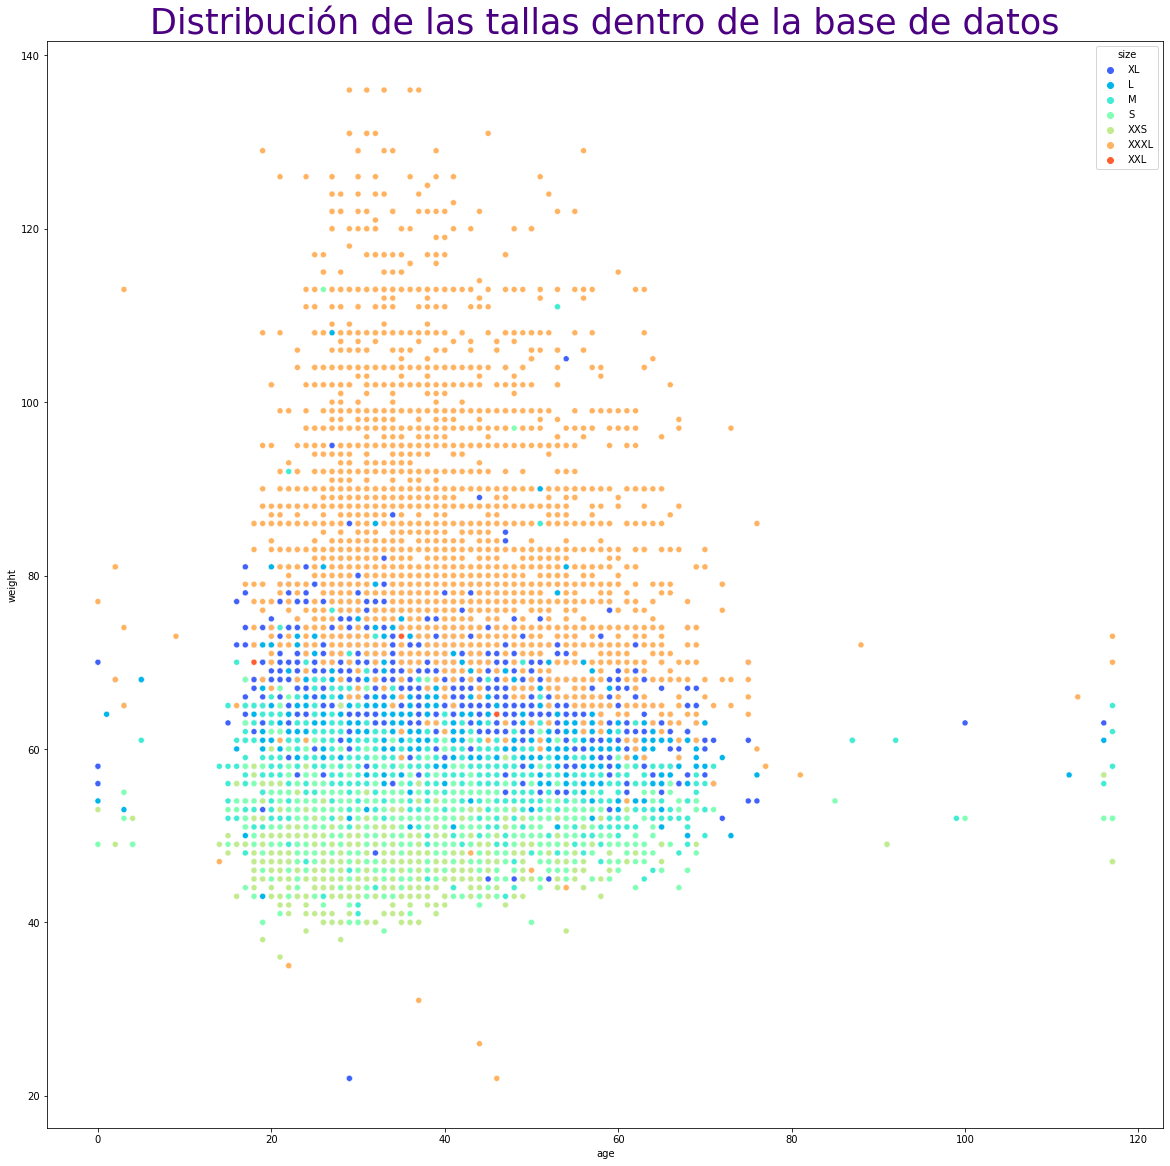

In [ ]:
data2 = pd.read_csv('https://raw.githubusercontent.com/MaasWaffen/Datasets/main/size_prediction.csv')
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot()
sns.scatterplot(x=data2['age'], y=data2['weight'], hue=data2['size'], ax=ax, palette='rainbow');
plt.title('Distribución de las tallas dentro de la base de datos',fontsize=35, ha="center", color='indigo');

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
X = data2[['age','weight']]
y = data2['size']

Ahora bien al realizar un promedio de los datos obtenidos y graficando sus distribuciones, podemos darnos cuenta el promedio de la altura, peso y edad de las personas de las que se les reclectaros sus datos y por ende su talla de ropa. ¿Pero esto para qué sirve?

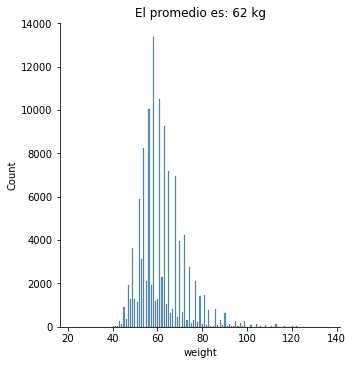

In [ ]:
sns.displot(data2['weight']);
mn = data2['weight'].mean()
plt.title(f'El promedio es: {round(mn)} kg');

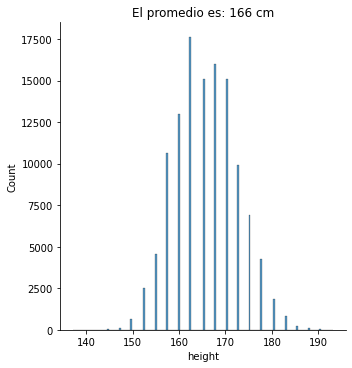

In [ ]:
sns.displot(data2['height']);
mn = data2['height'].mean()
plt.title(f'El promedio es: {round(mn)} cm');

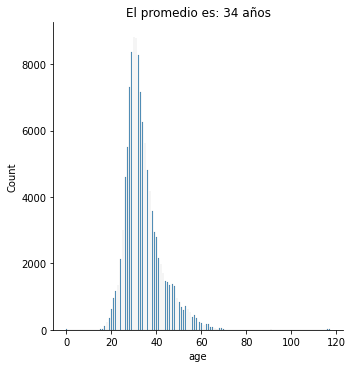

In [ ]:
sns.displot(data2['age']);
mn = data2['age'].mean()
plt.title(f'El promedio es: {round(mn)} años');

Este análisis nos sirve para hacer aún más claro el problema de la obesidad. Si vien analizamos los tres promedios de las tres variables de la base de datos. Altura de 1.66 m; Edad de 34 años; Peso por encima de los 62 kilos. Nos podemos dar cuenta que la población promedio es población relativamente jóven en los 30s, de alturas parecidas a la de la población mexicana. Por lo que tambien es claro que los resultados arrojan un problema de la alimentación al notarse que gran cantidad de pesosnas relativamente jóvenes se encuentran en tallas extra a pesar de que las alturas promedio no son muy altas, y mencionamos esto, porque muchas veces el peso será más alto porque la persona resulta ser muy alta, pero este no es el caso. Los promedios arrojados por las medias de cada parámetro indican claramente problemas de obesidad en la pobación relativamente jóven.

No realizaremos pruebas A/B debido a que este tipo de proyecto que estamos realizando no se presta para esto. Sin embargo, sí trabajaremos con técnicas de Procesamiento de Lenguaje Natural.

Para aplicar PLN buscaremos datos no estructurados dentro de nuestro dataset, entre los que tomaremos están:
*   Página Web
*   Correo (email)
*   Categoría


In [ ]:
nuevo_leon_poi.head()

,nombre_tienda,razon_social,sector_tienda,cantidad_personal,tipo_vialidad,calle,num_exterior,num_interior,colonia,codigo_postal,ubicacion,telefono,correo,pagina_web,longitud,latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,municipio,dimension_tienda,porcentaje_obesidad,valor_comercial,numero_tiendas_municipio,numero_tiendas_colonia,place_id,categoria,popularidad_actual,horarios_populares,rating,rating_numero,horarios_populares_dias,tiempo_espera
0,"Monterrey, plaza cumbres",SERVICIOS SHASA S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",11 a 30 personas,AVENIDA,HACIENDA DE PEÑUELAS,6771,0,CUMBRES LAS PALMAS,64349,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,WWW.SHASA.COM,-100.397801,25.733109,CENTRO Y PLAZA COMERCIAL,PLAZA CUMBRES,1151 A 1157,Monterrey,Sin especificar,42.2707,6098.849922,1578,5,ChIJzdEedx2XYoYRunctbvVhb-I,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar
1,"Monterrey, gal.valle ote",SERVICIOS SHASA S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",6 a 10 personas,CALLE,PASEO NARANJO,1000,0,VALLE DEL MIRADOR,64750,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,WWW.SHASA.COM,-100.313720,25.638831,CENTRO Y PLAZA COMERCIAL,GALERIAS VALLE ORIENTE,1144 Y 1146,Monterrey,Sin especificar,42.2707,6098.849922,1578,12,Sin especificar,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar
2,"Monterrey, san agustin",SERVICIOS SHASA S DE RL DE CV,"Comercio al por menor de ropa, excepto de bebé...",11 a 30 personas,AVENIDA,Batallón San Patricio,1000,0,REAL DE SAN AGUSTIN,66260,"SAN PEDRO GARZA GARCÍA, San Pedro Garza García...",0.0,Sin especificar,WWW.SHASA.COM,-100.336835,25.648094,CENTRO Y PLAZA COMERCIAL,PLAZA FIESTA SAN AGUSTIN,SN,San Pedro Garza Garcia,A,35.1730,4634.679777,247,4,ChIJ8VltnG6-YoYRnDAJPlfzjRk,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar
3,Ropa dama y cosmeticos,10 ROPA DAMA Y COSMETICOS,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,CALLE,SERAFIN PEÑA,1010,10,MONTERREY CENTRO,64000,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,Sin especificar,-100.326419,25.667601,"TIANGUIS, BAZAR O PULGA",PULGA RIO MONTERREY,10,Monterrey,Sin especificar,42.2707,6098.849922,1578,282,ChIJRZ7FCCK-YoYRLz6AgoPG-Ws,"['Shopping mall', 'Down home cooking restauran...",12,"[[7, [[6, 0, '', '', '6 AM'], [7, 0, '', '', '...",4.1,5618.0,"[{'name': 'Monday', 'data': [0, 0, 0, 0, 0, 0,...","[25, 25]"
4,Ropa dama,106 ROPA DAMA,"Comercio al por menor de ropa, excepto de bebé...",0 a 5 personas,CALLE,SERAFIN PEÑA,1010,0,MONTERREY CENTRO,64000,"MONTERREY, Monterrey, NUEVO LEÓN",0.0,Sin especificar,Sin especificar,-100.326419,25.667601,"TIANGUIS, BAZAR O PULGA",PULGA RIO MONTERREY,106,Monterrey,Sin especificar,42.2707,6098.849922,1578,282,Sin especificar,Sin especificar,0,Sin especificar,0.0,0.0,Sin especificar,Sin especificar


Utilizaremos patrones de Regex para limpiar nuestros datos.

**COLUMNA PÁGINA WEB**

In [ ]:
# Convertimos a minúsculas nuestra columna página web
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.lower()

In [ ]:
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.strip() # Eliminamos espacios al inicio y final
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.replace('\\n', '') # Eliminamos saltos de línea

Verificamos si existe algúna página web con algún caracter no válido, pero no encontramos ningún registro

In [ ]:
nuevo_leon_poi['pagina_web'][nuevo_leon_poi['pagina_web'].str.contains('[^\w^\.^\:^\/^\-^Sin especificar]', case=False)] # Es un filtro que verifica si contiene la cadena de texto, devolviendo TRUE o FALSE

Series([], Name: pagina_web, dtype: object)

Ahora verificamos aquellos registros que no empiezan con "www.*" podemos ver que hay algunas páginas que comienzan con http[s]:// quitamos esas cadenas para estandarizar

In [ ]:
nuevo_leon_poi['pagina_web'][nuevo_leon_poi['pagina_web'].str.contains('^(?!www.*)[^Sin especificar]', case=False)]

876                        gelatimo.com
1353            http://www.ferrioni.com
1667                  lexmijeans.com.mx
1842                   massimodutti.com
1909                     miapaluzzi.com
1942                 mockingbird.com.mx
2132                          zegna.com
2247    https://www.pullandbear.com/mx/
2250    https://www.pullandbear.com/mx/
2251    https://www.pullandbear.com/mx/
3012                       topia.com.mx
3015                       topia.com.mx
Name: pagina_web, dtype: object

In [ ]:
# Eliminamos los https://
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.replace('(http|https)://', '')

Podemos agregar el www. al principio de los registros debido a que son muy pocos.

In [ ]:
# Agregamos www
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.replace('gelatimo.com', 'www.gelatimo.com')
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.replace('lexmijeans.com.mx', 'www.lexmijeans.com.mx')
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.replace('massimodutti.com', 'www.massimodutti.com')
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.replace('miapaluzzi.com', 'www.miapaluzzi.com')
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.replace('mockingbird.com.mx', 'www.mockingbird.com.mx')
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.replace('zegna.com', 'www.zegna.com')
nuevo_leon_poi['pagina_web'] = nuevo_leon_poi['pagina_web'].str.replace('topia.com.mx', 'www.topia.com.mx')

verificamos que tenemos correctos todos los datos

In [ ]:
nuevo_leon_poi['pagina_web'][nuevo_leon_poi['pagina_web'].str.contains('^(?!www.*)[^Sin especificar]', case=False)]

Series([], Name: pagina_web, dtype: object)

**COLUMNA CORREO**

In [ ]:
# Convertimos a minúsculas nuestra columna correo
nuevo_leon_poi['correo'] = nuevo_leon_poi['correo'].str.lower()

In [ ]:
nuevo_leon_poi['correo'] = nuevo_leon_poi['correo'].str.strip() # Eliminamos espacios al inicio y final
nuevo_leon_poi['correo'] = nuevo_leon_poi['correo'].str.replace('\\n', '') # Eliminamos saltos de línea

Verificamos si existe algún registro que no cumpla con la estructura de un email. Como vemos, todos los email cumplen con la estructura.

In [ ]:
nuevo_leon_poi['correo'][nuevo_leon_poi['correo'].str.contains('^(?!(\w|\.|\_|\-)+[@](\w|\_|\-|\.)+[.]\w{2,3}[.]\w{2,3})$', case=False)]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



Series([], Name: correo, dtype: object)

### Nltk Text

Generamos un objeto Text con la librería nltk y exploramos los contextos algunas palabras. 
A través del método "similar" obtendremos palabras que tengan contextos similares a las palabras originales de la columna categoría. Esto con el fin de descubrir nuevas palabras con relevancia.

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Definimos un DataFrame vacío
nuevo_leon_poi_catego = pd.DataFrame({})

In [ ]:
# Limpiamos nuestros datos eliminando caracteres
nuevo_leon_poi_catego['categoria'] = nuevo_leon_poi['categoria'].str.replace('[', '') # Eliminamos caracter
nuevo_leon_poi_catego['categoria'] = nuevo_leon_poi_catego['categoria'].str.replace(']', '') # Eliminamos caracter
nuevo_leon_poi_catego['categoria'] = nuevo_leon_poi_catego['categoria'].str.replace('\'', '') # Eliminamos caracter
nuevo_leon_poi_catego['categoria'] = nuevo_leon_poi_catego['categoria'].str.replace('\,', '') # Eliminamos caracter
nuevo_leon_poi_catego['categoria'] = nuevo_leon_poi_catego['categoria'].str.replace('\"', '') # Eliminamos caracter

In [ ]:
nuevo_leon_poi_catego = nuevo_leon_poi_catego[nuevo_leon_poi_catego['categoria'] != 'Sin especificar'] # Eliminamos los registros con "Sin especificar"

In [ ]:
nuevo_leon_poi_catego['categoria']  # Verificamos que tenemos solo un listado de textos

3       Shopping mall Down home cooking restaurant Dre...
14      Shopping mall Down home cooking restaurant Dre...
15                                     Chinese restaurant
16                                     Chinese restaurant
17                                         Clothing store
                              ...                        
3685                                       Clothing store
3686                                     Department store
3689                                        Shopping mall
3691                                    Wholesale jeweler
3693                 Womens clothing store Clothing store
Name: categoria, Length: 1679, dtype: object

In [ ]:
# Separamos cada oración en palabras
tokenized = nuevo_leon_poi_catego['categoria'].apply(nltk.word_tokenize)

In [ ]:
tokenized

3       [Shopping, mall, Down, home, cooking, restaura...
14      [Shopping, mall, Down, home, cooking, restaura...
15                                  [Chinese, restaurant]
16                                  [Chinese, restaurant]
17                                      [Clothing, store]
                              ...                        
3685                                    [Clothing, store]
3686                                  [Department, store]
3689                                     [Shopping, mall]
3691                                 [Wholesale, jeweler]
3693           [Womens, clothing, store, Clothing, store]
Name: categoria, Length: 1679, dtype: object

In [ ]:
all_words = tokenized.sum()
all_words

['Shopping',
 'mall',
 'Down',
 'home',
 'cooking',
 'restaurant',
 'Dress',
 'store',
 'Gift',
 'wrap',
 'store',
 'Mens',
 'clothing',
 'store',
 'Perfume',
 'store',
 'Shoe',
 'store',
 'Watch',
 'store',
 'Shopping',
 'mall',
 'Down',
 'home',
 'cooking',
 'restaurant',
 'Dress',
 'store',
 'Gift',
 'wrap',
 'store',
 'Mens',
 'clothing',
 'store',
 'Perfume',
 'store',
 'Shoe',
 'store',
 'Watch',
 'store',
 'Chinese',
 'restaurant',
 'Chinese',
 'restaurant',
 'Clothing',
 'store',
 'Clothing',
 'store',
 'Book',
 'store',
 'Clothing',
 'store',
 'Shopping',
 'mall',
 'Shopping',
 'mall',
 'Down',
 'home',
 'cooking',
 'restaurant',
 'Dress',
 'store',
 'Gift',
 'wrap',
 'store',
 'Mens',
 'clothing',
 'store',
 'Perfume',
 'store',
 'Shoe',
 'store',
 'Watch',
 'store',
 'Clothing',
 'store',
 'Clothing',
 'store',
 'Department',
 'store',
 'Baby',
 'clothing',
 'store',
 'Cafeteria',
 'Clothing',
 'store',
 'Fabric',
 'store',
 'Notions',
 'store',
 'Perfume',
 'store',
 'Shoe'

In [ ]:
text = nltk.Text(all_words)
text

<Text: Shopping mall Down home cooking restaurant Dress store...>

In [ ]:
text.concordance('Clothing', lines=20, width = 100) # lines - Podemos ver la cantidad de resultados que queremos
                                                 # width= longitud

Displaying 20 of 947 matches:
                                              clothing store Perfume store Shoe store Watch store Sh
g restaurant Dress store Gift wrap store Mens clothing store Perfume store Shoe store Watch store Ch
h store Chinese restaurant Chinese restaurant Clothing store Clothing store Book store Clothing stor
 restaurant Chinese restaurant Clothing store Clothing store Book store Clothing store Shopping mall
rant Clothing store Clothing store Book store Clothing store Shopping mall Shopping mall Down home c
g restaurant Dress store Gift wrap store Mens clothing store Perfume store Shoe store Watch store Cl
ng store Perfume store Shoe store Watch store Clothing store Clothing store Department store Baby cl
e store Shoe store Watch store Clothing store Clothing store Department store Baby clothing store Ca
ng store Clothing store Department store Baby clothing store Cafeteria Clothing store Fabric store N
epartment store Baby clothing store Cafeteria Clothing store 

In [ ]:
# similar nos regresa palabras que aparecen en contextos similares al argumento, en nuestro caso usamos la palabra Clothing, ya que es un concepto que gira en torno a nuestro proyecto de venta de ropa de tallas extra
text.similar('Clothing')

dress shoe jewelry uniform department notions store furniture grocery
fabric lingerie outlet convenience appliance camping couture
sunglasses perfume book baby


In [ ]:
# common_contexts regresa los contextos que comparten dos o más palabras, usamos las palabras Clothing y store
text.common_contexts(['Clothing', 'store']) 

store_store baby_store service_store shop_store store_manufacturer


In [ ]:
# Calculamos el total de palabras
len(text)

6505

In [ ]:
# Ahora, calculamos el total de palabras distintas, que representa menos del 10% del total, 
len(set(text))

496

In [ ]:
# Justo con esto podemos comprobar que no tenemos una gran riqueza léxica, debido a que se repiten muchas de nuestras palabras
len(set(text)) / len(text)

0.07624903920061492

### Utiliza el objeto FreqDist de nltk

FreqDist nos servirá para realizar el análisis estadístico de nuestro dataset, ya que a través de el podrémos explorar las palabras y los bigramas más comunes.

In [ ]:
nltk.download('stopwords') # Los stopwords son palabras demasiado comunes para analizarse, por ejemplo la 'a'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Las colocaciones son pares de palabras (bigramas) que son inusualmente comunes en nuestro conjunto de datos
# obtenemos las colocaciones, y podemos observar que Clothing es inusualmente común
text.collocations()

Clothing store; clothing store; Womens clothing; Shopping mall;
Fashion accessories; Mens clothing; store Clothing; Formal wear; Auto
parts; American restaurant; Childrens clothing; Tool rental;
accessories store; home cooking; Car battery; store Womens; Dress
store; Gift shop; rental service; Tourist attraction


In [ ]:
# Ahora utilizamos FreqDist para analizar la distribución de frecuencia de nuestras palabras
freq_dist = nltk.FreqDist(text)
print(freq_dist)

<FreqDist with 496 samples and 6505 outcomes>


In [ ]:
freq_dist.most_common(50)

[('store', 1715),
 ('Clothing', 542),
 ('clothing', 405),
 ('Womens', 180),
 ('restaurant', 159),
 ('Boutique', 141),
 ('shop', 140),
 ('accessories', 105),
 ('Mens', 102),
 ('service', 83),
 ('mall', 81),
 ('Fashion', 81),
 ('Shopping', 80),
 ('Dress', 79),
 ('Shoe', 68),
 ('Store', 64),
 ('Childrens', 64),
 ('Car', 53),
 ('Gift', 52),
 ('Jewelry', 41),
 ('goods', 40),
 ('Restaurant', 38),
 ('American', 38),
 ('Auto', 35),
 ('Baby', 32),
 ('Formal', 31),
 ('wear', 31),
 ('parts', 30),
 ('Perfume', 28),
 ('Youth', 27),
 ('Department', 25),
 ('Uniform', 25),
 ('rental', 25),
 ('Watch', 24),
 ('Tool', 24),
 ('Breakfast', 23),
 ('battery', 23),
 ('Hotel', 22),
 ('office', 22),
 ('bar', 22),
 ('Family', 20),
 ('supplier', 19),
 ('Corporate', 19),
 ('Supermarket', 18),
 ('Public', 18),
 ('Bar', 18),
 ('Down', 17),
 ('home', 17),
 ('cooking', 17),
 ('wrap', 17)]

Ahora, vamos a eliminar los'stop words'

In [ ]:
english_stop_words = stopwords.words('english')
all_words_except_stop_words = [word for word in text if word not in english_stop_words]
freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

In [ ]:
freq_dist_no_stop_words.most_common(50)

[('store', 1715),
 ('Clothing', 542),
 ('clothing', 405),
 ('Womens', 180),
 ('restaurant', 159),
 ('Boutique', 141),
 ('shop', 140),
 ('accessories', 105),
 ('Mens', 102),
 ('service', 83),
 ('mall', 81),
 ('Fashion', 81),
 ('Shopping', 80),
 ('Dress', 79),
 ('Shoe', 68),
 ('Store', 64),
 ('Childrens', 64),
 ('Car', 53),
 ('Gift', 52),
 ('Jewelry', 41),
 ('goods', 40),
 ('Restaurant', 38),
 ('American', 38),
 ('Auto', 35),
 ('Baby', 32),
 ('Formal', 31),
 ('wear', 31),
 ('parts', 30),
 ('Perfume', 28),
 ('Youth', 27),
 ('Department', 25),
 ('Uniform', 25),
 ('rental', 25),
 ('Watch', 24),
 ('Tool', 24),
 ('Breakfast', 23),
 ('battery', 23),
 ('Hotel', 22),
 ('office', 22),
 ('bar', 22),
 ('Family', 20),
 ('supplier', 19),
 ('Corporate', 19),
 ('Supermarket', 18),
 ('Public', 18),
 ('Bar', 18),
 ('Down', 17),
 ('home', 17),
 ('cooking', 17),
 ('wrap', 17)]

In [ ]:
# Realizamos un conteo de la palabra Clothing, así como el calculo del porcentaje de aparición
print(f'{(100 * freq_dist_no_stop_words["Clothing"] / len(all_words_except_stop_words)):.3f}%') # Podemos observar que tiene un porcentaje de aparición alto, de hecho es de los más altos.

8.351%


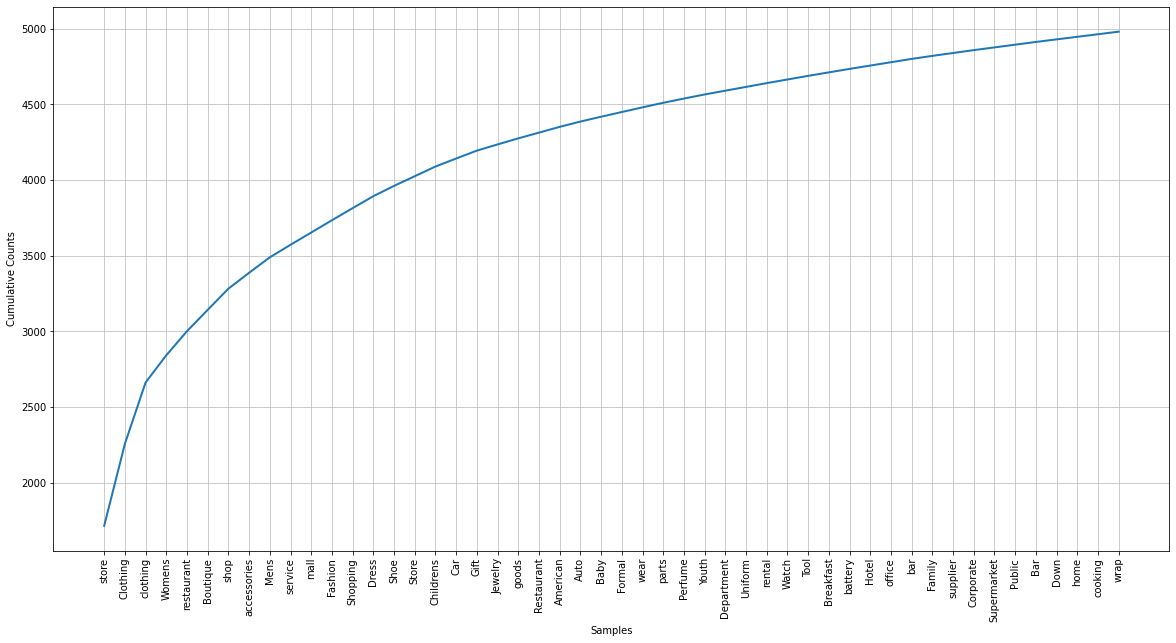

In [ ]:
# Veamos qué proporción del text está siendo ocupada por las 50 palabras más comunes
fig = plt.figure(figsize=(20, 10))
freq_dist_no_stop_words.plot(50, cumulative=True);

In [ ]:
# Ahora calculamos las palabras que sólo aparecen una sola vez
freq_dist_no_stop_words.hapaxes()[:20]

['Movie',
 'handcraft',
 'Tattoo',
 'piercing',
 'Laboratory',
 'audio',
 'Bazar',
 'Mediterranean',
 'Kosher',
 'Eastern',
 'Butcher',
 'bag',
 'Drafting',
 'centre',
 'Higher',
 'education',
 'Resort',
 'DVD',
 'Musician',
 'Charter']

In [ ]:
# Por su parte podemos obtener las palabras largas
unique = set(all_words_except_stop_words)
unique_series = pd.Series(list(unique))

unique_series

0         education
1              stay
2           Textile
3            grocer
4             Paint
           ...     
488           Pizza
489        Boarding
490      forwarding
491    Occupational
492         Chicken
Length: 493, dtype: object

In [ ]:
unique_series[unique_series.str.len() > 15]

128    Telecommunications
dtype: object

In [ ]:
# Adicional, calculamos la frecuencia de las Palabras largas
larger_than_10 = unique_series.str.len() > 7
is_frequent = unique_series.apply(lambda x: freq_dist_no_stop_words[x] > 7)

unique_series[larger_than_10 & is_frequent]

25        Corporate
82       Restaurant
85         American
134    Manufacturer
144      wholesaler
201      consultant
204        designer
205       Gastropub
212        clothing
215        Shopping
217      university
233       Hamburger
250      attraction
258        Swimwear
264        Clothing
280        Lingerie
293        Boutique
306       equipment
328        Sporting
332        Cocktail
333       Childrens
338     Supermarket
339    organization
356     Electronics
359        supplier
366      University
378     accessories
389      restaurant
418      Needlework
422        Pharmacy
424       Furniture
450      alteration
478      Department
483       Breakfast
dtype: object

In [ ]:
# Podemos contar otras cosas, como la frecuencia de longitudes de nuestras palabras
freq_dist_lengths = nltk.FreqDist([len(w) for w in all_words_except_stop_words])

In [ ]:
freq_dist_lengths.most_common()

[(5, 2136),
 (8, 1411),
 (4, 771),
 (7, 562),
 (6, 560),
 (10, 403),
 (9, 237),
 (11, 173),
 (3, 167),
 (12, 43),
 (1, 16),
 (13, 8),
 (18, 2),
 (2, 1)]

In [ ]:
freq_dist_lengths.max()

5

In [ ]:
freq_dist_lengths[5]

2136

In [ ]:
# También podemos saber qué proporción del total de palabras tiene longitud de 5
freq_dist_lengths.freq(5)

0.32912172573189524

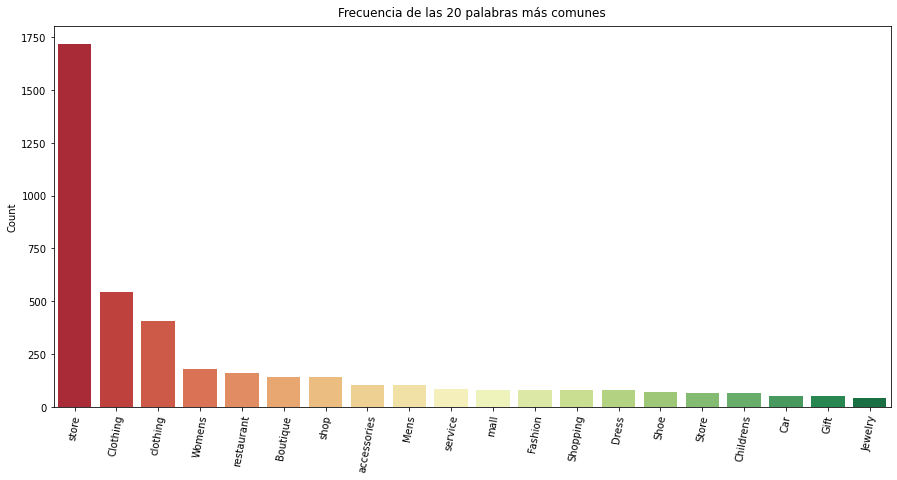

In [ ]:
# Y podemos visualizar la frecuencia de las palabras más comunes

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(20))))

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot()

sns.barplot(x = most_common_20[:, 0], y = most_common_20[:, 1].astype(int), ax=ax, palette='RdYlGn');
ax.set_title('Frecuencia de las 20 palabras más comunes', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

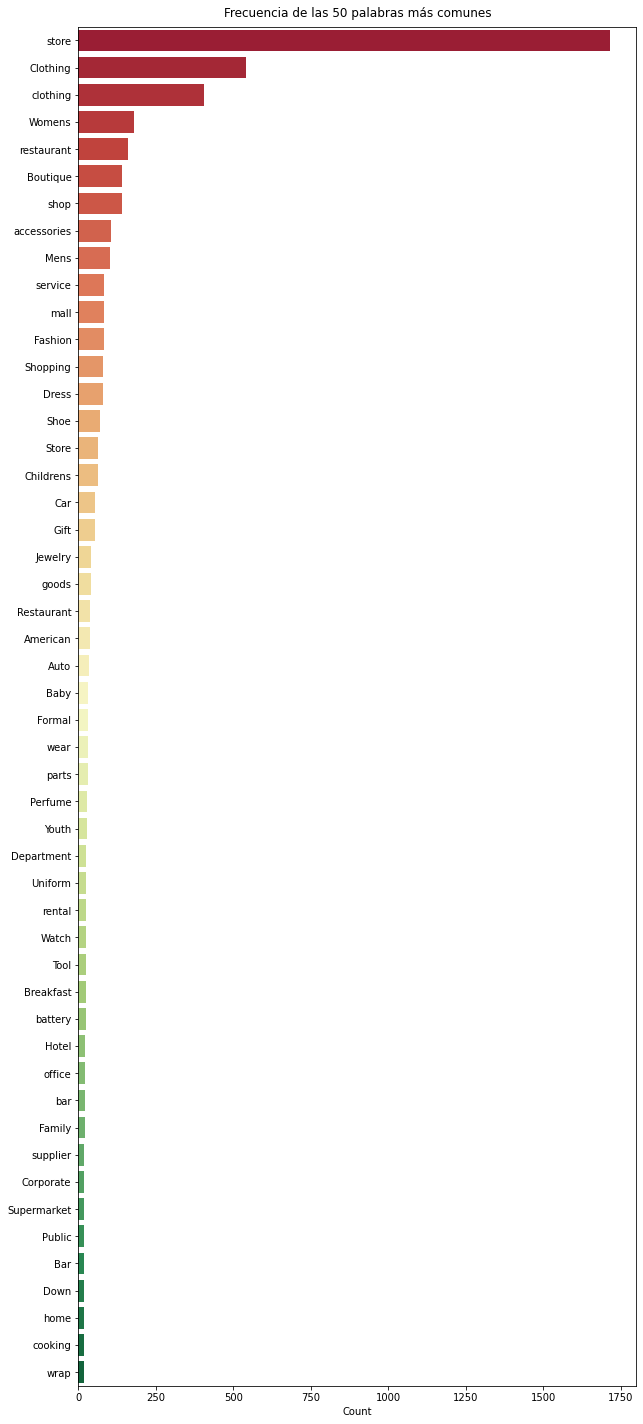

In [ ]:
# Visualizar la frecuencia de las 50 palabras más comunes
most_common_50 = np.array(list(map(lambda x: list(x), freq_dist_no_stop_words.most_common(50))))

fig = plt.figure(figsize=(10, 25))
ax = fig.add_subplot()

sns.barplot(x = most_common_50[:, 1].astype(int), y = most_common_50[:, 0], ax=ax, palette='RdYlGn', orient='h');
ax.set_title('Frecuencia de las 50 palabras más comunes', pad=10)
ax.set_xlabel('Count');

In [ ]:
# También podemos visualizar la frecuencia de los bigramas más comunes

text = nltk.Text(all_words)
freq_dist_bigrams = nltk.FreqDist(list(nltk.bigrams(text)))

freq_dist_bigrams

FreqDist({('Shopping', 'mall'): 80,
          ('mall', 'Down'): 17,
          ('Down', 'home'): 17,
          ('home', 'cooking'): 17,
          ('cooking', 'restaurant'): 17,
          ('restaurant', 'Dress'): 18,
          ('Dress', 'store'): 79,
          ('store', 'Gift'): 46,
          ('Gift', 'wrap'): 17,
          ('wrap', 'store'): 17,
          ('store', 'Mens'): 76,
          ('Mens', 'clothing'): 96,
          ('clothing', 'store'): 405,
          ('store', 'Perfume'): 27,
          ('Perfume', 'store'): 28,
          ('store', 'Shoe'): 57,
          ('Shoe', 'store'): 68,
          ('store', 'Watch'): 23,
          ('Watch', 'store'): 24,
          ('store', 'Shopping'): 43,
          ('store', 'Chinese'): 1,
          ('Chinese', 'restaurant'): 2,
          ('restaurant', 'Chinese'): 1,
          ('restaurant', 'Clothing'): 13,
          ('Clothing', 'store'): 516,
          ('store', 'Clothing'): 353,
          ('store', 'Book'): 1,
          ('Book', 'store'): 2,
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



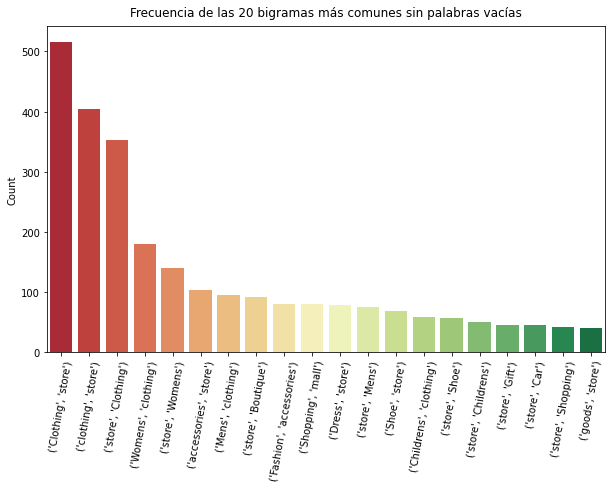

In [ ]:
most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_bigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x = most_common_20[:, 0], y = most_common_20[:, 1], ax=ax, palette='RdYlGn');
ax.set_title('Frecuencia de las 20 bigramas más comunes sin palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:
# Y adicional no solo los bigramas, sino que también podemos visualizar n-gramas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



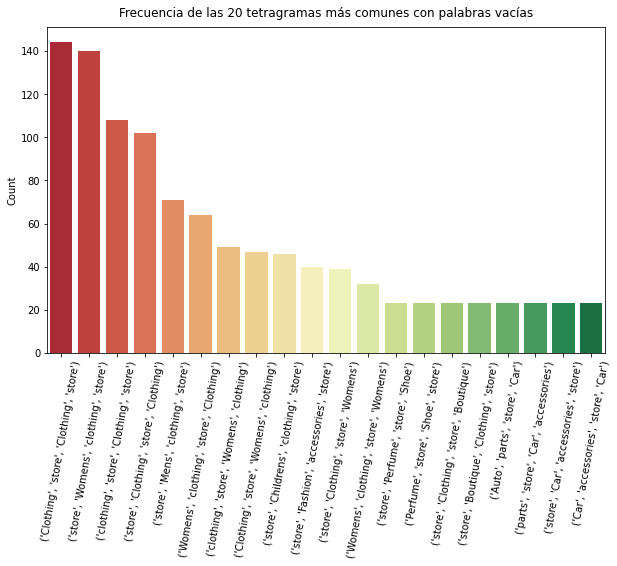

In [ ]:
text = nltk.Text(all_words)
freq_dist_trigrams = nltk.FreqDist(list(ngrams(text, 4)))

most_common_20 = np.array(list(map(lambda x: list(x), freq_dist_trigrams.most_common(20))))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot()

sns.barplot(x = most_common_20[:, 0], y = most_common_20[:, 1], ax=ax, palette='RdYlGn');
ax.set_title('Frecuencia de las 20 tetragramas más comunes con palabras vacías', pad=10)
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=80)

In [ ]:
# Generamos un histograma para visualizar la frecuencia de longitudes de palabras y oraciones

word_lengths = [len(w) for w in all_words_except_stop_words]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



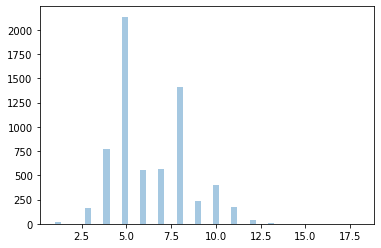

In [ ]:
sns.distplot(word_lengths, kde=False, norm_hist=False);

Y ahora realizamos una nube de palabras utilizando la librería wordcloud, con el fin de detectar los temas más importantes dentro de las categorías, en donde podemos encontrar a Clothing, store, Womens clothing y Mens clothing

# **Colocación de centros de distribución**
Para nuestro análisis se busco una estrategía para obtener puntos geográficos para la instalación de centro de distribución de la mercancía. Para ello se utilizo las ubicaciones de tiendas OXXO del Estado de Nuevo León, debido que estas tiendas tienen un estudio para la ubicación de las tiendas, que se tiene como objetivo, poner en rutas de facil acceso para su redistribución de mercanacías. Buscamos predecir estas locaciones mediante K-means de los datos longitud y latitud, para encontrar las posiciones adecuadas.

### Justificación de la selección de la cadena de Oxxo.

Oxxo se ha convertido en el retailer de alimentos y bebidas más exitoso de México. Desde la apertura de su primera tienda, en 1978, ha tenido un crecimiento vertiginoso que le llevó a ser la cadena de tiendas de conveniencia más grande del país, Su despliegue territorial ha sido tal que tiene siete veces más tiendas que su competidor más cercano, 7Eleven, que opera mil 699 unidades en México.

En este punto se tomo como referencia la logistica de una empresa  que figura como una de las mas grandes cadenas de tiendas de conveniencia mexicana.
Dicha empresa se encarga de identificar las ubicaciones ideales y así definir su estrategia de expansión, según la densidad poblacional de cada zona, además toma en cuenta su logística, la cual tiene como objetivo el brindar a los proveedores con capacidad logística limitada la posibilidad de entregar el producto en sus centros de distribución, llevando los productos en un menor tiempo a sus tiendas.

Este último punto es fundamental para nuestro análisis ya que en módulos anteriores se realizo un estudio donde se encontró la ubicación geográfica óptima para la ubicación de la tienda.
Ubicar de forma correcta las instalaciones de venta e instalaciones a lo largo de una cadena de suministro es una decisión importante que da forma, estructura y conformidad al sistema logístico.

En este punto  se busca hacer una comparativa de las ubicaciones de una fábrica/almacen y de un punto de venta. Alguno de los punto a considerar son:
- Potencial de ingresos de un lugar determinado. 
- Evita la necesidad de considerar las fuerzas competitivas, la ruptura de la demanda entre diferentes instalaciones.
- Y nuestro último punto el cual se tomara como principal en nuestro análisis , el coste de transporte es el principal punto que debemos considerar para realizar envios. Dependiendo del caso, las instalaciones pueden representar una gran inversión en activos fijos, dificilmente revertidos a corto y medio plazo, lo que por su vez implica un alto coste para la ubicación de la instalación en otro sitio.

En esta gráfica podemos observar la distrución de los centros lógisticos con respecto a las tiendas, estos se encuentrán repartidos de acuerdo a la proximidad de estos. Obteniendo una buena distrubición de los centros y las tiendas, siendo esto un indicador aceptable para la colación de los centros en dichas locaciones (o aproximadas) y dividir al estado en estas 5 regiones que puedan facilitar la distrución de mercancia, sin saturar a los centros y no dejar zonas sin posibilidad de distribución.
Cabe mencionar que si bien se puede hacer un estudio aparte de los lugares más idoneos para colocar una sucursal de almacenamiento del producto, decidimos selecionar en este caso la cadena oxxo para minimizar precios, además los resultados obtenidos no se tomarán como un aspecto absoluto, ya que si alguno de los centroides generaodos por el algoritmo de acuerdo a la distribución de las localizaciones clave no llegara a ser propicia para nuestro producto según nuestro criterio, se tomaría a consideración si sí o no se escogería dicho punto o buscaría seleccionarse algun otro.


In [ ]:
def config_plotter(options):
  global ax
  fig = plt.figure()
  ax = fig.add_subplot()

  ax.set_xlabel(options[0])
  ax.set_ylabel(options[1])
  ax.set_title(title, pad=options[2])
  return ax

In [ ]:
def draw_plotter_hubs(x, y, options, simple=True, hubs=None, hue=None, show_legend=False):
  ax = config_plotter(options)
  if hue is not None:
    sns.scatterplot(x=x, y=y, ax=ax, hue=hue, palette='rainbow');
  else:
    sns.scatterplot(x=x, y=y, ax=ax);
  if simple and hubs is None:
    return

  sns.scatterplot(x=hubs[:,0], y=hubs[:,1], ax=ax, s=options[3], color=options[4]);

In [ ]:
def location_hub(k_means, data):
  k_means.fit(data)
  return k_means.cluster_centers_

In [ ]:
def group_predict(k_means, data):
  return k_means.predict(data)


Primeramente buscamos las ubicaciones de todas la tiendas oxxo que hay en el Estado de Nuevo León, estos dados son obtenidos mediante el INEGI DENUE.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Axelflg/datasets/main/INEGI_DENUE_24042021_TDC.csv', encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 41 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   ID                                                       1634 non-null   int64  
 1   Nombre de la Unidad Económica                            1634 non-null   object 
 2   Razón social                                             1634 non-null   object 
 3   Código de la clase de actividad SCIAN                    1634 non-null   int64  
 4   Nombre de clase de la actividad                          1634 non-null   object 
 5   Descripcion estrato personal ocupado                     1634 non-null   object 
 6   Tipo de vialidad                                         1632 non-null   object 
 7   Nombre de la vialidad                                    1634 non-null   object 
 8   Tipo de entre vialidad 1    

Se filtra los datos para obtener solo las tiendas para no incluir gasolineras o otros negociones, no realacionado a las tiendas.

In [ ]:
oxxo_stores = df[df['Razón social'] == 'CADENA COMERCIAL OXXO SA DE CV']

In [ ]:
total_stores = len(oxxo_stores)
total_stores

1458

Obtnemos solo los datos que nos interesa de cada tienda, siendo la Latitud y Longitud.

In [ ]:
oxxo_lt_lng = oxxo_stores[['ID','Entidad federativa', 'Municipio', 'Latitud', 'Longitud']]
oxxo_lt_lng

,ID,Entidad federativa,Municipio,Latitud,Longitud
0,6364399,NUEVO LEÓN,Apodaca,25.758350,-100.135955
1,6373612,NUEVO LEÓN,Apodaca,25.805462,-100.219699
2,6364460,NUEVO LEÓN,General Escobedo,25.842452,-100.367604
3,6781228,NUEVO LEÓN,Monterrey,25.712324,-100.295272
4,6367759,NUEVO LEÓN,Santa Catarina,25.699651,-100.502650
...,...,...,...,...,...
1629,6373662,NUEVO LEÓN,Monterrey,25.620591,-100.285116
1630,6704199,NUEVO LEÓN,Allende,25.289380,-100.017785
1631,6699694,NUEVO LEÓN,Apodaca,25.730311,-100.163535
1632,6724021,NUEVO LEÓN,Apodaca,25.744951,-100.160826


Gráficamos la concentración de las tiendas, utilizamos 5 clusters, debido a que tiene pensado empezar con esta número para abarcar de mejor forma al estado de Nuevo León, sin saturar a un centro logistico y sin poner muchos centros, lo que significaría un ahorro.

Buscamos las locaciones, basados en la latitud y longitud de cada una de las tiendas.

In [ ]:
k_means = KMeans(n_clusters=5, max_iter=10000)
hubs = location_hub(k_means, oxxo_lt_lng[['Latitud', 'Longitud']])
hubs

array([[  25.02419437,  -99.83833204],
       [  25.69665964, -100.18951627],
       [  26.70022412, -100.16595478],
       [  25.72215946, -100.36612724],
       [  25.91131049,  -99.36995973]])

Obtenemos nuestras locaciones para la ubicación de nuestros centros de distribucion.

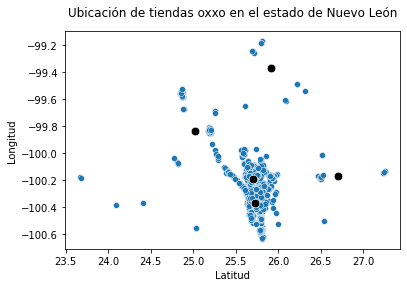

In [ ]:
title = 'Ubicación de tiendas oxxo en el estado de Nuevo León'
x_label = 'Latitud'
y_label = 'Longitud'

draw_plotter_hubs(oxxo_lt_lng['Latitud'], oxxo_lt_lng['Longitud'], [x_label, y_label, 15, 75, 'black'], False ,hubs)

In [ ]:
groups_to_hub = group_predict(k_means, oxxo_lt_lng[['Latitud', 'Longitud']])
groups_to_hub

array([1, 1, 3, ..., 1, 1, 1], dtype=int32)

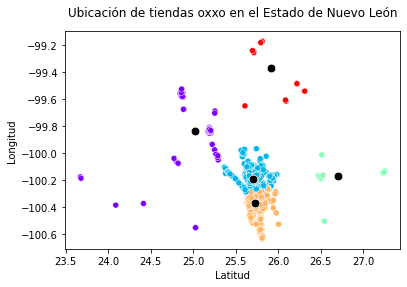

In [ ]:
draw_plotter_hubs(oxxo_lt_lng['Latitud'], oxxo_lt_lng['Longitud'], [x_label, y_label, 15, 75, 'black'], False, hubs, groups_to_hub)
ax.get_legend().remove()

En esta gráfica podemos observar la distrución de los centros lógisticos con respecto a las tiendas, estos se encuentrán repartidos de acuerdo a la proximidad de estos. Obteniendo una buena distrubición de los centros y las tiendas, siendo esto un indicador aceptable para la colación de los centros en dichas locaciones (o aproximadas) y dividir al estado en estas 5 regiones que puedan facilitar la distrución de mercancia, sin saturar a los centros y no dejar zonas sin posibilidad de distribución.